In [21]:
import os
import sys
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from scipy.signal import welch, firwin, filtfilt, hilbert
from scipy.stats import spearmanr
from time import gmtime
from statsmodels.tsa.api import SimpleExpSmoothing

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/wassilyminkow/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['stack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
sys.path.insert(0, '/Users/wassilyminkow/Scripts/Python3/')

from Neuroinformatics.torpor_project.data import *
from Neuroinformatics.math.pandas.statistics import *
from Neuroinformatics.data.pandas.time_series import TimeSeries
from Neuroinformatics.math.curves import *
from Neuroinformatics.math.regression import *

In [23]:
pylab.rcParams['figure.figsize'] = (22, 18)
sns.set(font_scale=1.5)

In [24]:
eeg_path = "/Users/wassilyminkow/Data/NakedMoleRat_Data/csv/"

In [6]:
acceleration.shape[0] * 5 / 60 / 24

NameError: name 'acceleration' is not defined

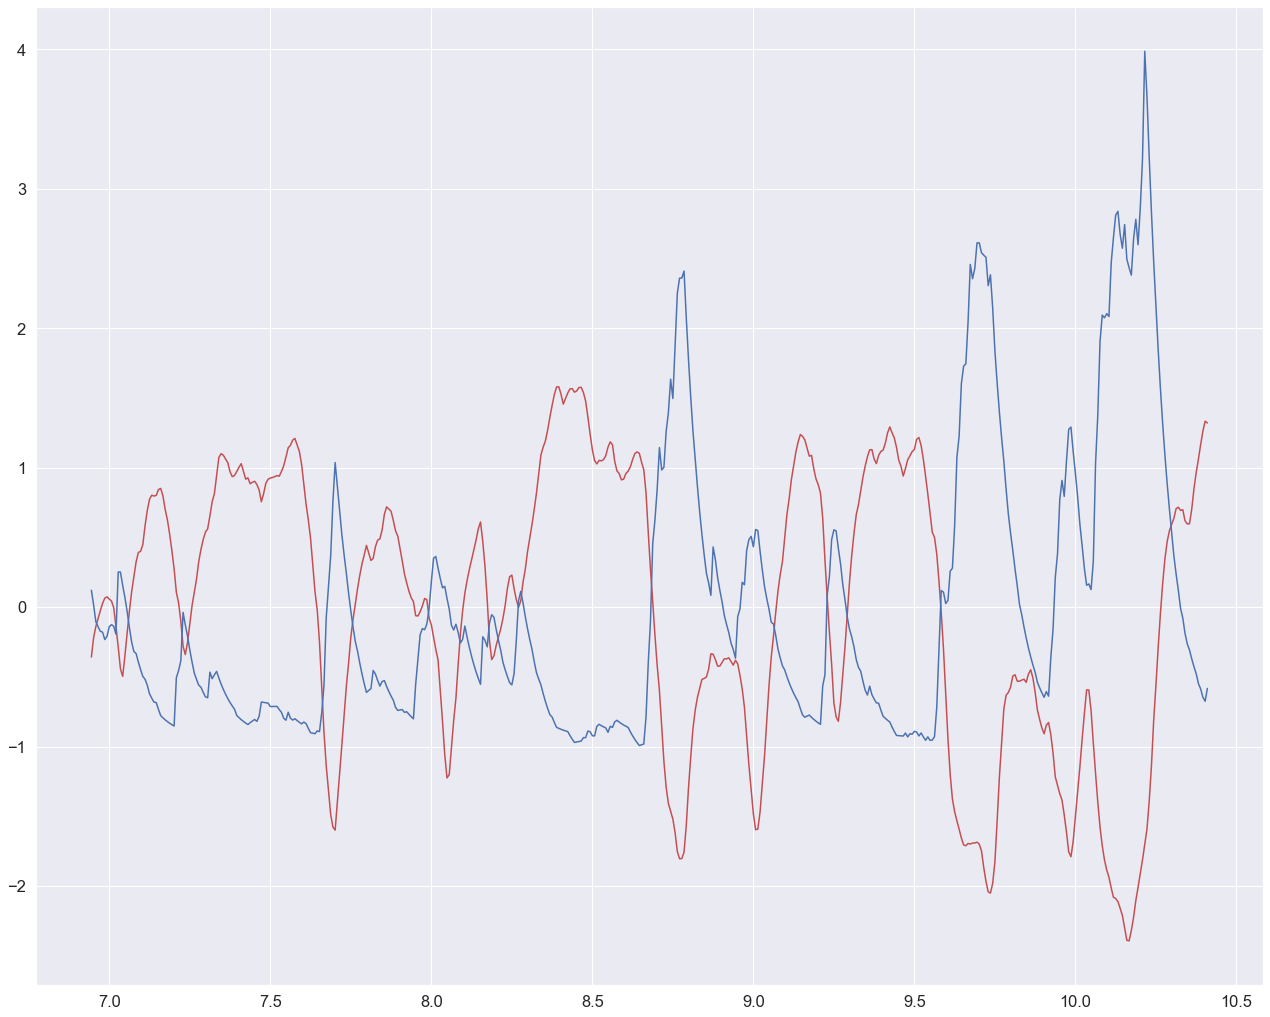

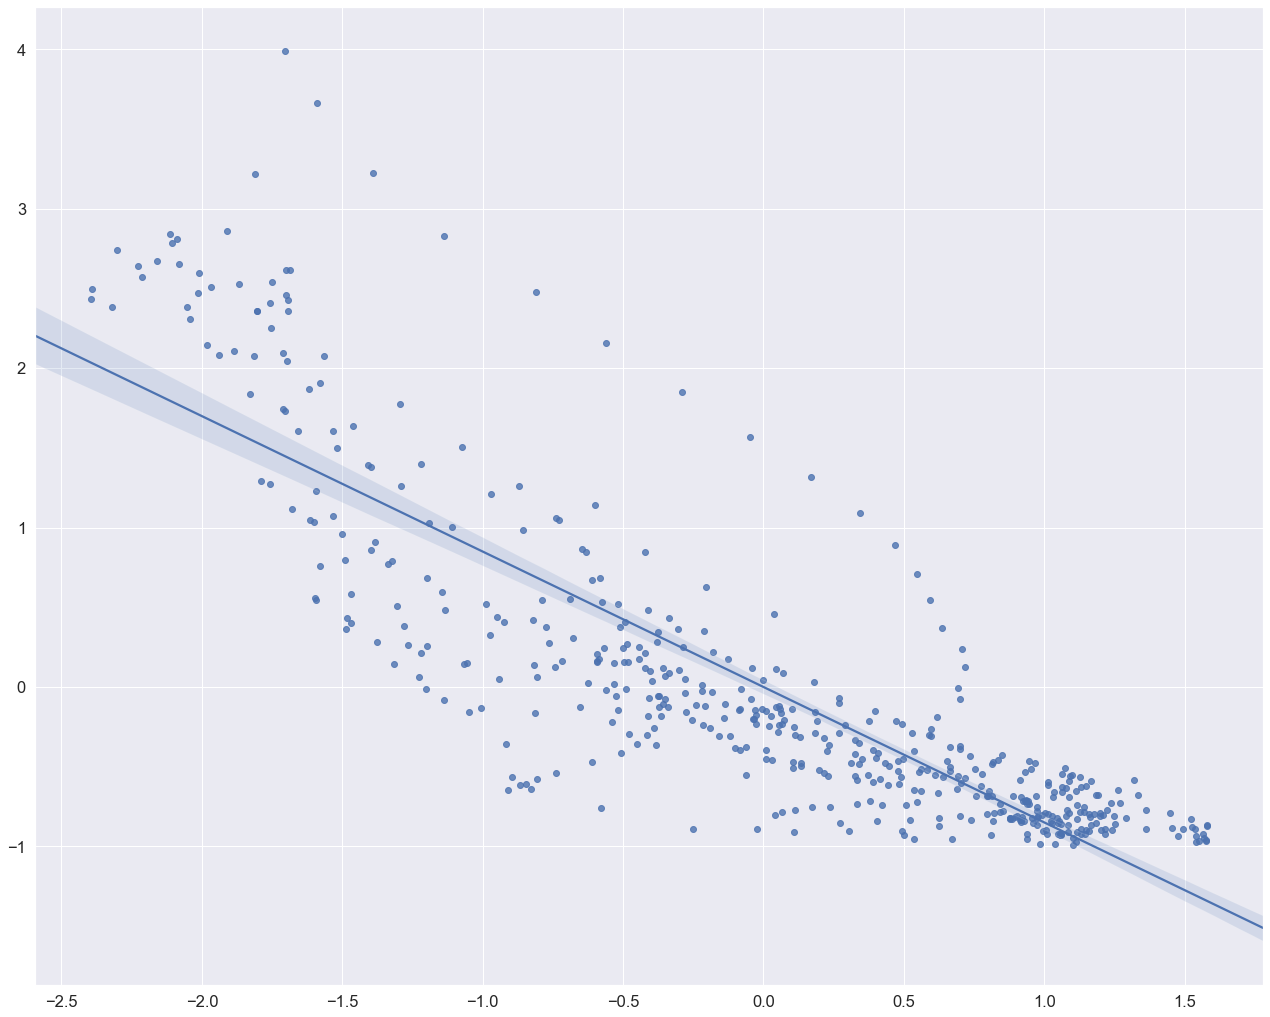

In [297]:
corr = "Negative"
sl = 0.1

# for i, subject in enumerate(os.listdir(eeg_path), 1):
    
#     data = pd.read_csv(eeg_path+subject).dropna()
# fs = 12
# order = 
# a = 1
# b = firwin(order, 1 * 2 / fs, width=None, window='hamming', pass_zero=False) # design filter
# acceleration = filtfilt(b, a, df["dG"].astype(float))
# temperature  = filtfilt(b, a, df["T"].astype(float)) 
    
acceleration = SimpleExpSmoothing(df["dG"].astype(float)).fit(smoothing_level=sl, optimized=False).fittedvalues
temperature = SimpleExpSmoothing(df["T"].astype(float)).fit(smoothing_level=sl, optimized=False).fittedvalues
time_array = np.asanyarray(df.index[:temperature.shape[0]])/6/24

# z = moving_correlation(time_array, temperature, acceleration, gap=6*12, correlation=corr.lower())

# print(spearmanr(acceleration, temperature))
# sns.scatterplot(acceleration, temperature)
# show()

# top = np.max([(standardize(temperature)).max(), (standardize(acceleration)).max()])
# bottom = np.min([(standardize(temperature)).min(), (standardize(acceleration)).min()])
# skip_start = 0

# tech = np.ones(z[0][1][:].shape[0])
# name = "First Buddy"

n = 1000
k = 1500

# subplot(1,1,1)
# fill_between(z[2][1][:], tech*top, tech*bottom, alpha=0.5, facecolor="mistyrose", label = "60% > Negative Spearman Correlation> 40%")
# fill_between(z[1][1][:], tech*top, tech*bottom, alpha=0.5, facecolor="lemonchiffon", label = "80% > Negative Spearman Correlation > 60%")
# fill_between(z[0][1][:], tech*top, tech*bottom, alpha=0.5, facecolor="lightgreen", label = "Negative Spearman Correlation > 80 %")
plot(time_array[n:k], standardize(temperature[n:k]), "r", label="Body Temperature Trend")
plot(time_array[n:k], standardize(acceleration[n:k]), "b", label="Acceleration Trend")
# title(f"Subject {name} Body Temperature And Acceleration Trends \nSignificant (5 Sigma Threshold) Moving Correlation (Window = 12 Hours)")
# ylabel("Standartized Values")
# xlabel("Time (Days)")
# legend(loc="best")
show()

sns.regplot(standardize(temperature[n:k]), standardize(acceleration[n:k]))
show()


In [283]:
values

Time (hours) Light  Standardized Mean Body Temperature  \
0        0.000000    On                           -0.446936   
1        0.166667    On                           -0.461964   
2        0.333333    On                           -0.481087   
3        0.500000    On                           -0.500031   
4        0.666667    On                           -0.518436   
..            ...   ...                                 ...   
139     23.166667   Off                            1.910562   
140     23.333333   Off                            1.902881   
141     23.500000   Off                            1.895558   
142     23.666667   Off                            1.890970   
143     23.833333   Off                            1.888069   

     Standardized Mean Acceleration  
0                          1.144154  
1                          1.138649  
2                          1.125471  
3                          1.103094  
4                          1.089229  
..                              ...  
139                       -2.031678  
140                       -2.042407  
141                       -2.050958  
142                       -2.055255  
143                       -2.064471  

[144 rows x 4 columns]

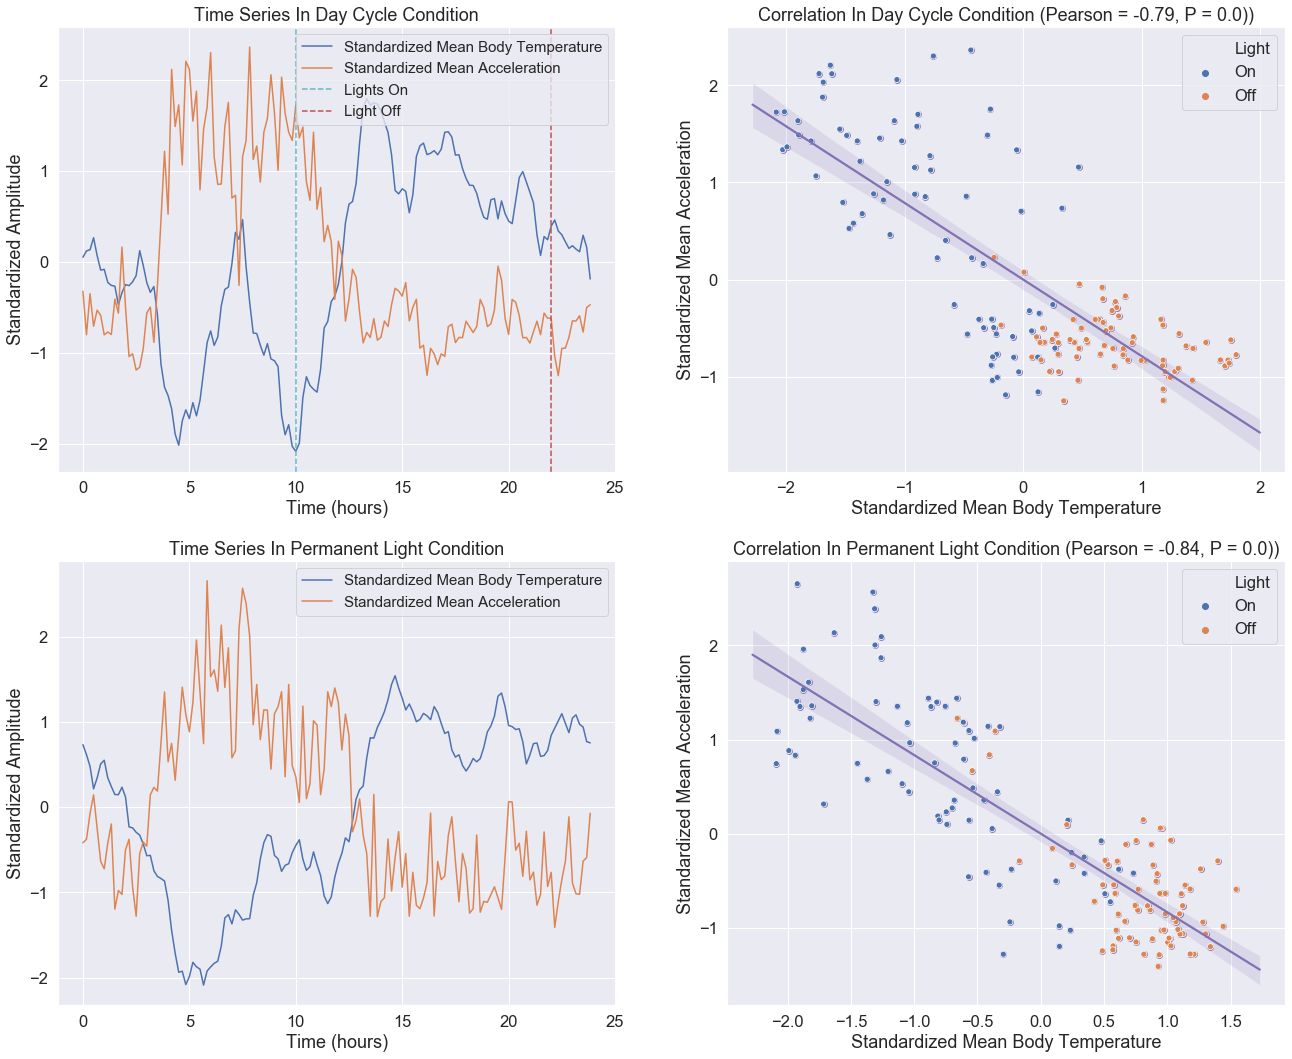

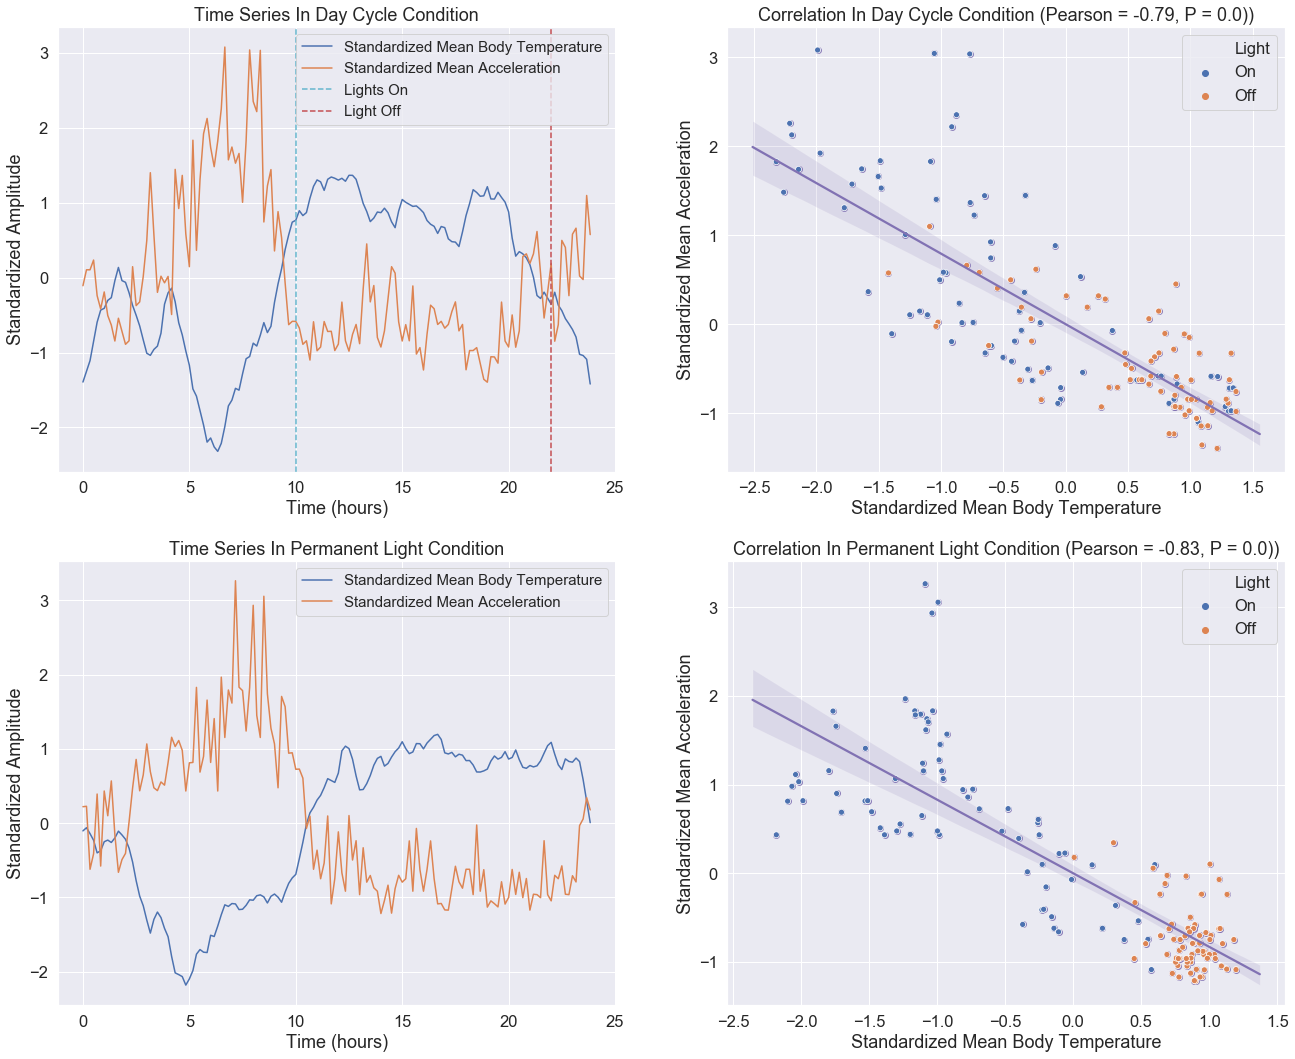

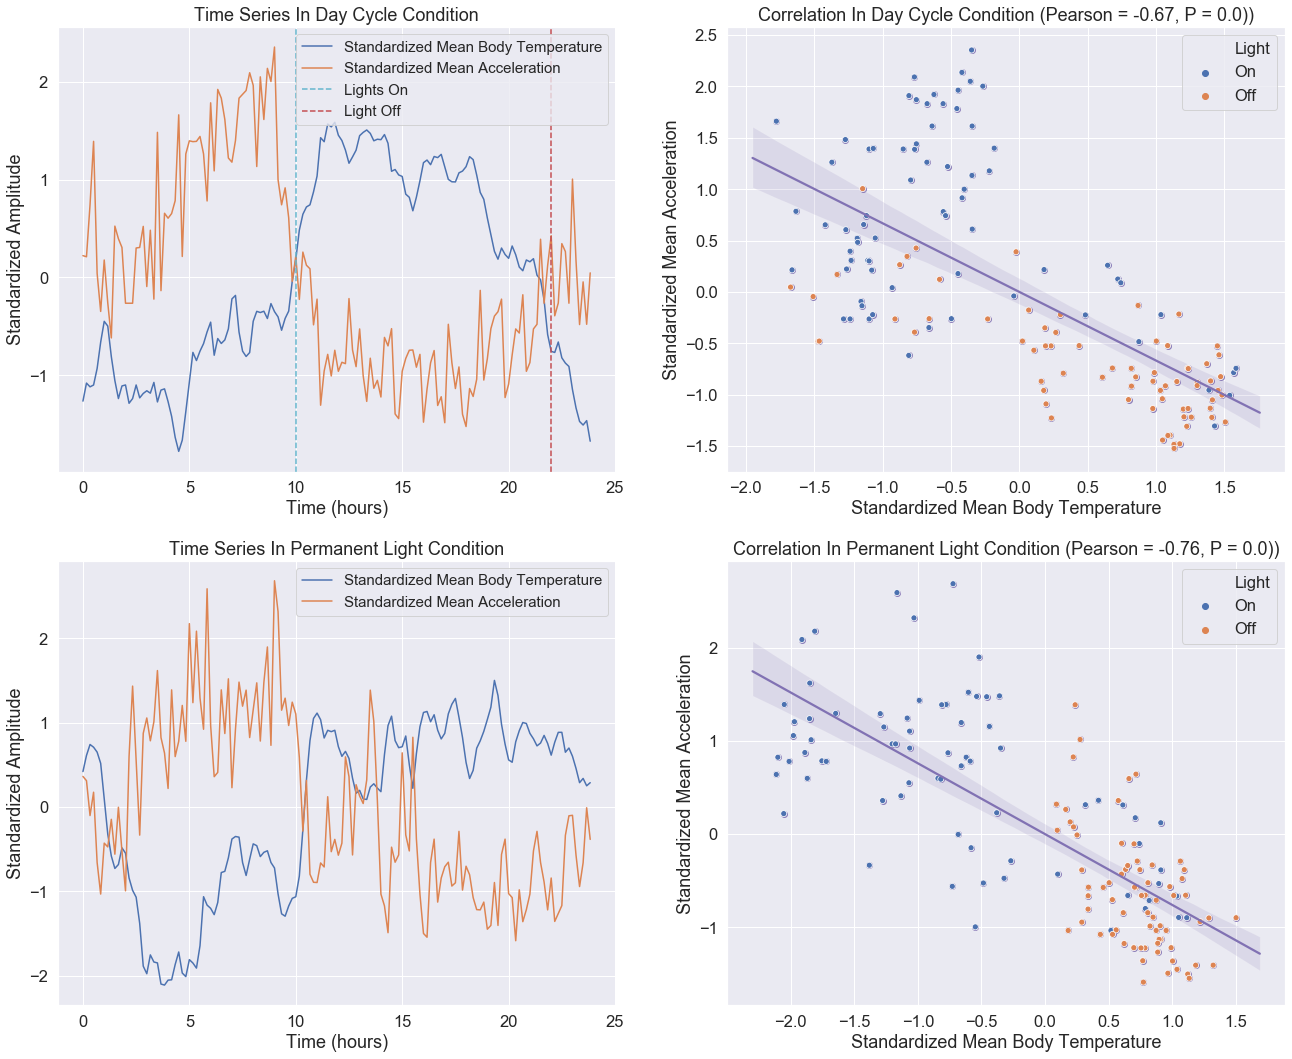

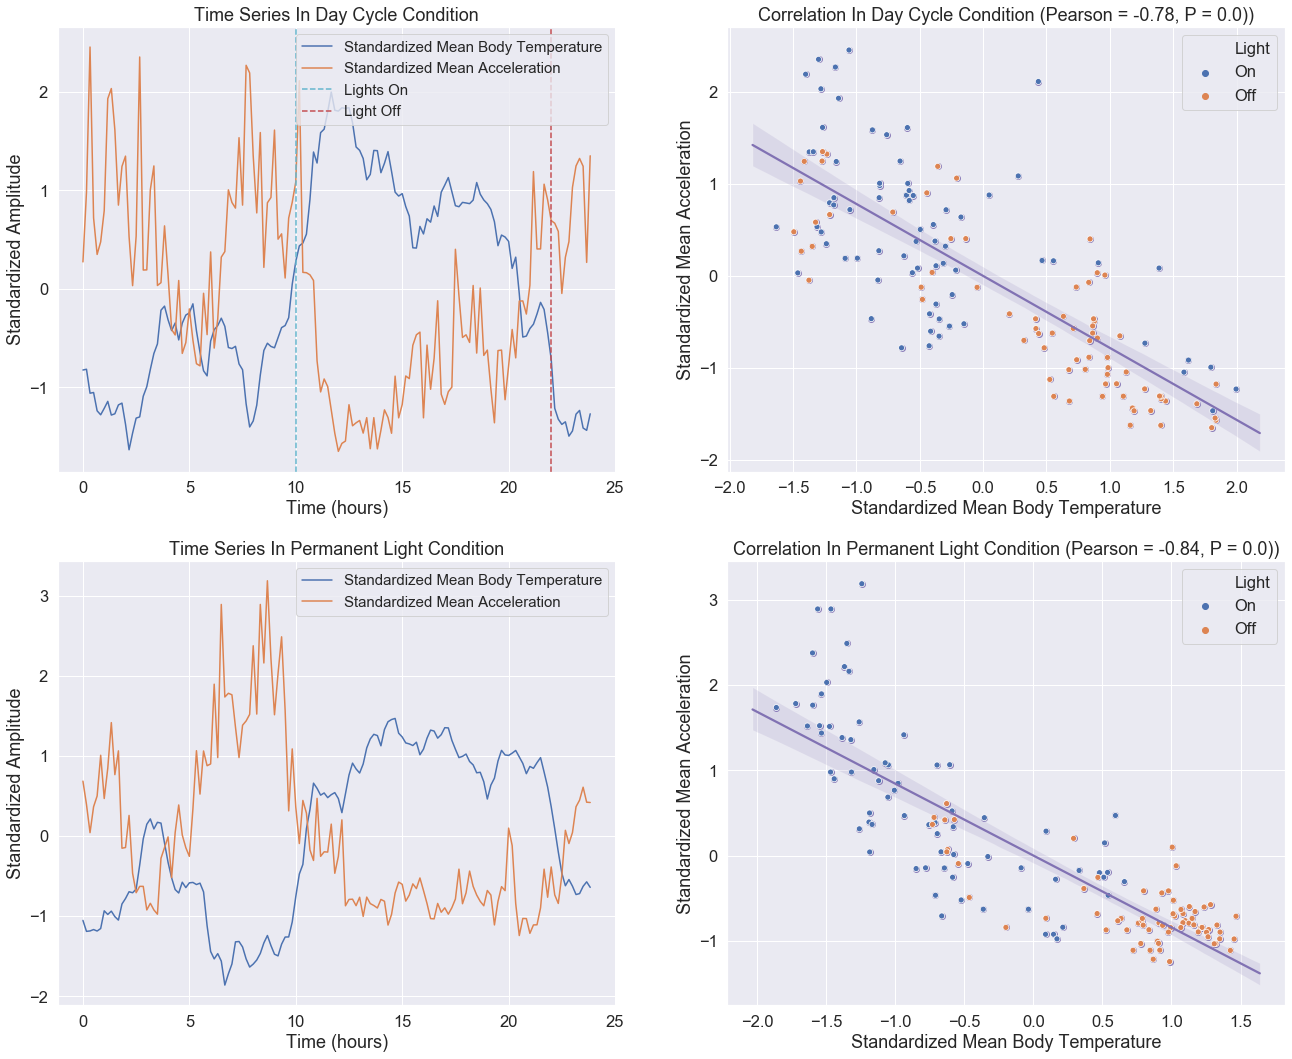

In [25]:
smoothing = lambda x: x #SimpleExpSmoothing(x).fit(smoothing_level=0.1, optimized=False).fittedvalues
variables = ['T', 'dG']
labels = ['Standardized Mean Body Temperature', 'Standardized Mean Acceleration']
condition = ['Day Cycle', 'Permanent Light']
stacks = []

# plt.style.use('grayscale')


for sheet in range(2, 6):
    
    # Load sheet from xls file.
    
    # Choose sheet type.
    if sheet > 3:
        skip = 3
    else:
        skip = 2
        
    a = pd.read_excel("/Users/wassilyminkow/Downloads/NakedMoleRates.xls", sheet_name=sheet).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[skip:-4,:-2]
    a.columns = a.iloc[0, :]
    a = a.iloc[1:, :]
    a = a.reset_index(drop=True)
    df = a.iloc[:,1:]
    
    min_sep = df['минуты'].min()
    start_ids = df[(df['час'] == 10) &
               (df['минуты'] == min_sep)
              ].index[:-1]   
    
    epoch_length = start_ids[2] - start_ids[1]
    
    fig, ax = plt.subplots(2, 2)

    change_id = np.argwhere(start_ids == df[(df['день'] == 25) & (df['час'] == 10) & (df['минуты'] == min_sep)].index[0])[0][0]

    for i, condition_ids in enumerate([start_ids[:change_id], start_ids[change_id:]]):

        values = {}
#         values['Time (hours)'] = np.concatenate([np.linspace(10, 24, epoch_length/2, endpoint=False), np.linspace(0, 10, epoch_length/2, endpoint=False)])
        values['Time (hours)'] = np.linspace(0, 24, epoch_length, endpoint=False)
        values['Light'] = ["On"] * int(epoch_length/2) + ["Off"] * int(epoch_length/2)

        for j, variable in enumerate(variables):

#             stack = smoothing(
#                     df.iloc[condition_ids[0]:(len(condition_ids)*epoch_length)+condition_ids[0], :][variable].fillna(np.nan).interpolate('spline', order=3).values
#             ).reshape(len(condition_ids), epoch_length).mean(axis=0).astype(float)

#             values[labels[j]] = standardize(stack)

            stack = smoothing(
                    df.iloc[condition_ids[0]:(len(condition_ids)*epoch_length)+condition_ids[0], :][variable].fillna(np.nan).interpolate('spline', order=3).values
            ).reshape(len(condition_ids), epoch_length)

            values[labels[j]] = standardize(stack.mean(axis=0).astype(float))

            stacks.append(stack)

        values = pd.DataFrame(values)

        a = sns.lineplot(x="Time (hours)", y=labels[0], data = values, ax=ax[i, 0], label=labels[0])
        sns.lineplot(x="Time (hours)", y=labels[1], data = values, ax=ax[i, 0], label=labels[1])
        a.legend_.remove()
        if i == 0:
            ax[i, 0].axvline(x=10, color="c", linestyle="--", label="Lights On")
            ax[i, 0].axvline(x=22, color="r", linestyle="--",label="Light Off")
        ax[i, 0].set_title(f"Time Series In {condition[i]} Condition") # for VM
        ax[i, 0].set_ylabel("Standardized Amplitude") # for VM
        ax[i, 0].legend(prop={'size': 15}) # for VM
#         ax[i, 0].set_ylabel('') # for VM
#         ax[i, 0].set_xlabel('') # for VM
    

        sns.regplot(x=labels[0], y=labels[1], data = values, ax=ax[i, 1], color='m')
        corr = pearsonr(values[labels[0]], values[labels[1]])
        ax[i, 1].set_title(f"Correlation In {condition[i]} Condition (Pearson = {round(corr[0], 2)}, P = {round(corr[1], 4)}))") # for VM
        sns.scatterplot(x=labels[0], y=labels[1], data = values, ax=ax[i, 1], hue = 'Light')
    
#         ax[i, 1].set_ylabel('') # for VM
#         ax[i, 1].set_xlabel('') # for VM
    
    
        plt.savefig(f"Subject {sheet}.png")

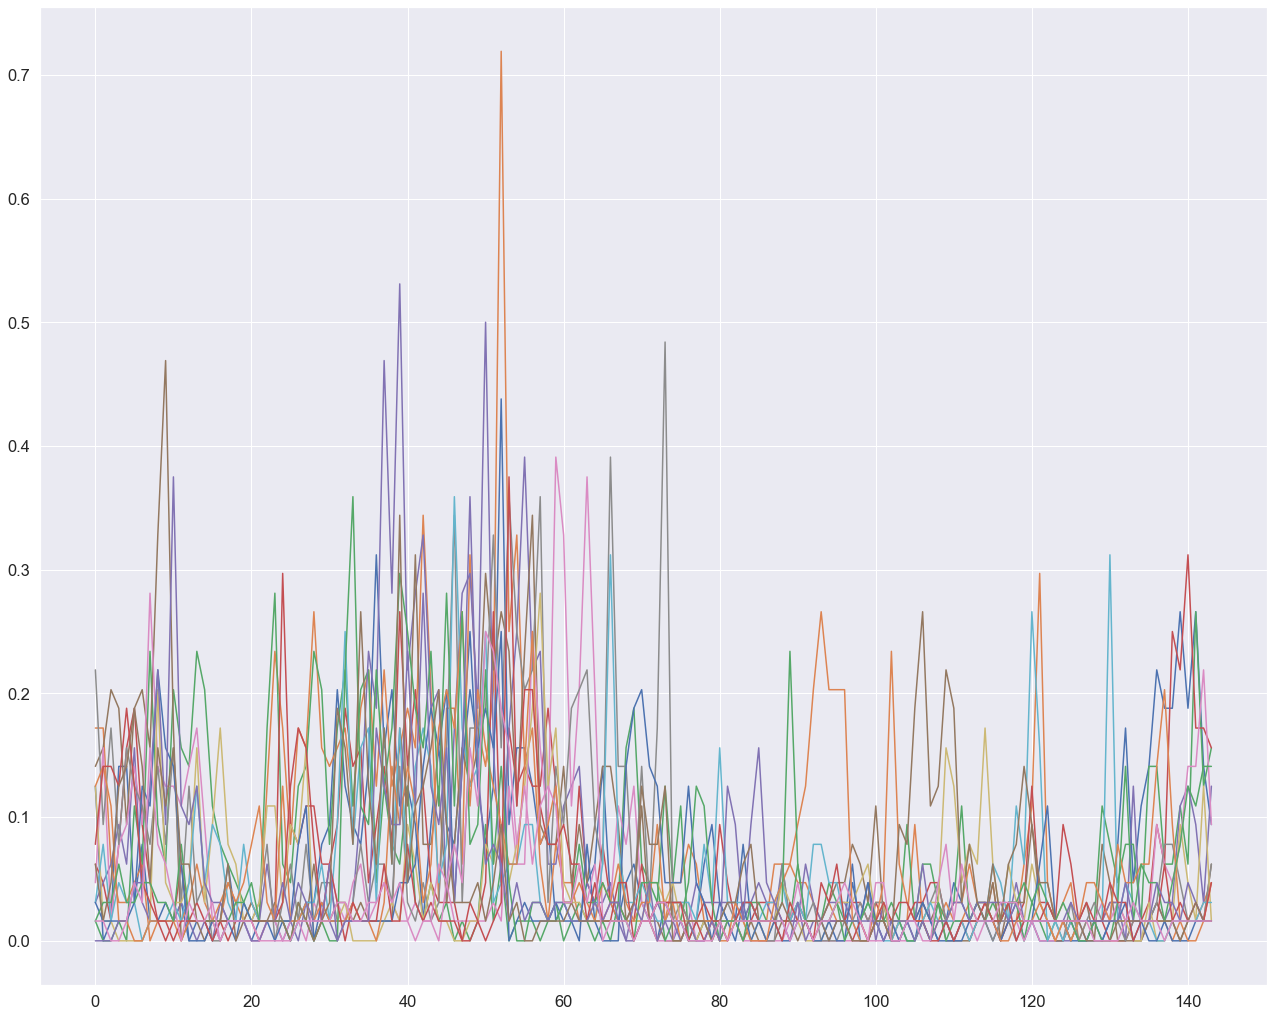

In [308]:
plot(stack.T)

In [260]:
values

Standardized Mean Body Temperature  Standardized Mean Acceleration  \
0                             -1.105587                        0.025500   
1                             -0.981913                        0.196308   
2                             -1.009267                        1.101241   
3                             -0.882266                        0.448685   
4                             -0.832472                       -0.097203   
..                                  ...                             ...   
139                           -1.019250                        0.490516   
140                           -1.139199                        0.219315   
141                           -1.169637                        0.218618   
142                           -1.208195                        0.087549   
143                           -1.414176                        0.545593   

     Time (hours) Light  
0       10.000000    On  
1       10.194444    On  
2       10.388889    On  
3       10.583333    On  
4       10.777778    On  
..            ...   ...  
139      9.305556   Off  
140      9.444444   Off  
141      9.583333   Off  
142      9.722222   Off  
143      9.861111   Off  

[144 rows x 4 columns]

ValueError: Must pass 2-d input

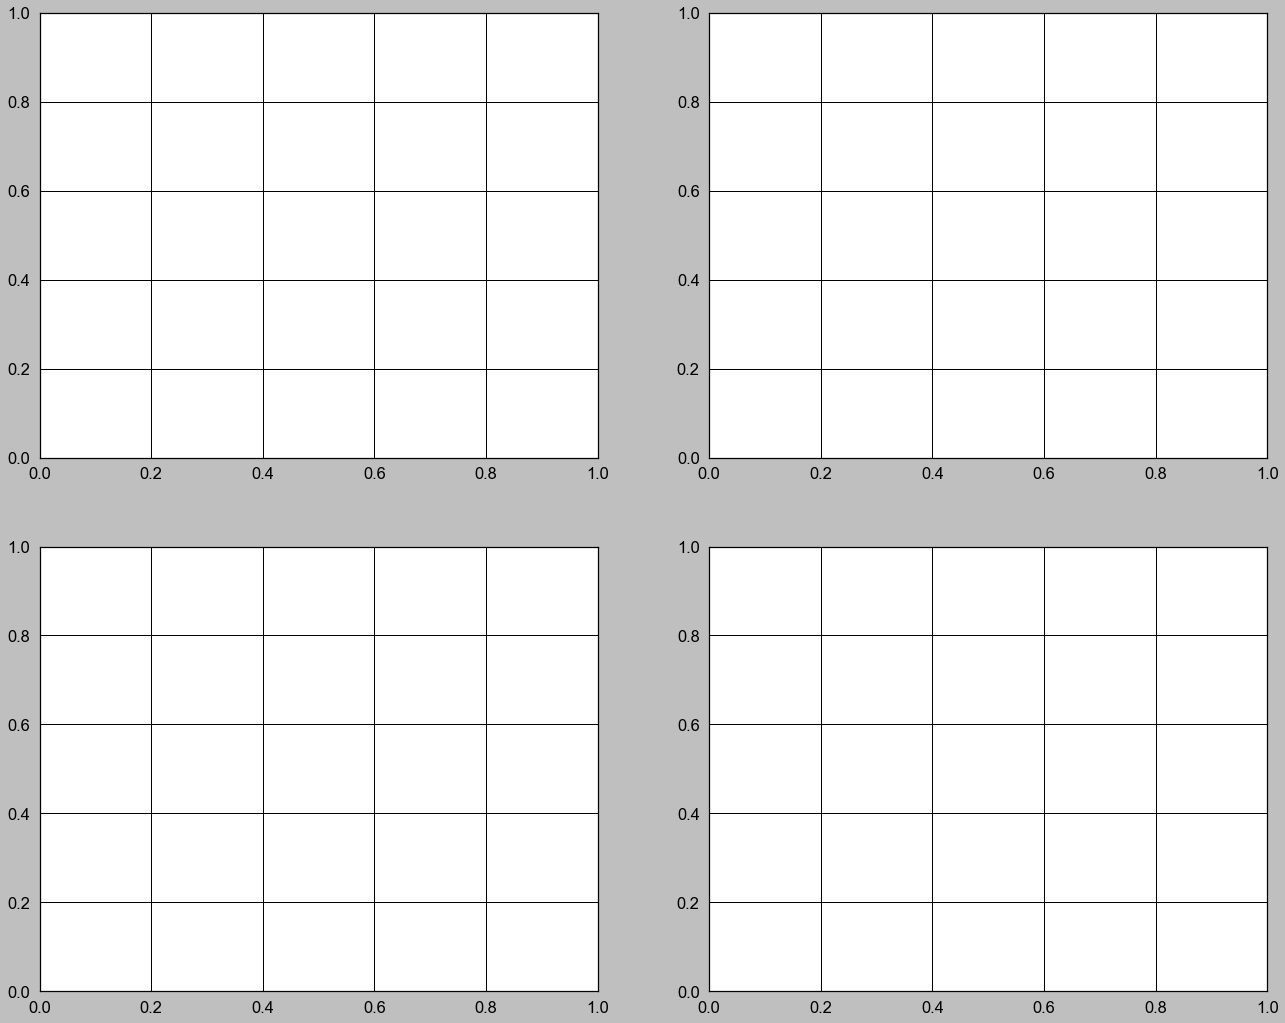

In [18]:
plt.style.use('grayscale')

fig, ax = plt.subplots(2, 2)

for i in range(2):

    values = pd.DataFrame(
        np.stack(
            [standardize(np.stack([stacks[j], stacks[j+4], stacks[j+8], stacks[j+12]], axis=1).mean(axis=1)) for j in range(0+i*2, 2+i*2)],
        axis = 1)
    )
    values.columns = labels
#     values['Time (hours)'] = np.concatenate([np.linspace(10, 24, epoch_length/2, endpoint=False), np.linspace(0, 10, epoch_length/2, endpoint=False)])
    values['Time (hours)'] = np.linspace(0, 24, epoch_length, endpoint=False)
    values['Light'] = ["On"] * int(epoch_length/2) + ["Off"] * int(epoch_length/2)

    sns.lineplot(x="Time (hours)", y=labels[0], data = values, ax=ax[i, 0], label=labels[0])
    sns.lineplot(x="Time (hours)", y=labels[1], data = values, ax=ax[i, 0], label=labels[1])
#     if i == 0:
#         ax[i, 0].axvline(x=10, color="c", linestyle="--", label="Lights On")
#         ax[i, 0].axvline(x=22, color="r", linestyle="--",label="Light Off")
    ax[i, 0].set_title(f"Time Series In {condition[i]} Condition")
    ax[i, 0].set_ylabel("Standardized Amplitude")
    ax[i, 0].legend(prop={'size': 15})

    sns.regplot(x=labels[0], y=labels[1], data = values, ax=ax[i, 1], color="m")
    corr = pearsonr(values[labels[0]], values[labels[1]])
    ax[i, 1].set_title(f"Correlation In {condition[i]} Condition (P = {round(corr[0], 2)})")
    plt.savefig("Cross-Subject.png")

In [237]:
values

Time (hours) Light  Standardized Mean Body Temperature  \
0       10.000000    On                           -1.053913   
1       10.194444    On                           -1.190723   
2       10.388889    On                           -1.185424   
3       10.583333    On                           -1.168108   
4       10.777778    On                           -1.186469   
..            ...   ...                                 ...   
139      9.305556   Off                           -0.730807   
140      9.444444   Off                           -0.719164   
141      9.583333   Off                           -0.628330   
142      9.722222   Off                           -0.572352   
143      9.861111   Off                           -0.641391   

     Standardized Mean Acceleration  
0                          0.684715  
1                          0.392417  
2                          0.041660  
3                          0.364907  
4                          0.499020  
..                              ...  
139                        0.364907  
140                        0.447438  
141                        0.609061  
142                        0.421647  
143                        0.418208  

[144 rows x 4 columns]

In [33]:
# 2 3
a = pd.read_excel("/Users/wassilyminkow/Downloads/NakedMoleRates.xls", sheet_name=2).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[2:-4,:-2]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]

In [134]:
# 4
a = pd.read_excel("/Users/wassilyminkow/Downloads/NakedMoleRates.xls", sheet_name=4).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-2]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]

In [108]:
# 5
a = pd.read_excel("/Users/wassilyminkow/Downloads/NakedMoleRates.xls", sheet_name=5).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-2]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]

In [10]:
min_sep = df['минуты'].min()
start_ids = df[(df['час'] == 10) &
           (df['минуты'] == min_sep)
          ].index[:-1]

NameError: name 'df' is not defined

In [11]:
epoch_length = start_ids[2] - start_ids[1]

NameError: name 'start_ids' is not defined

In [12]:
smoothing = lambda x: x # SimpleExpSmoothing(x).fit(smoothing_level=0.1, optimized=False).fittedvalues

In [13]:
stacks = []

NameError: name 'start_ids' is not defined

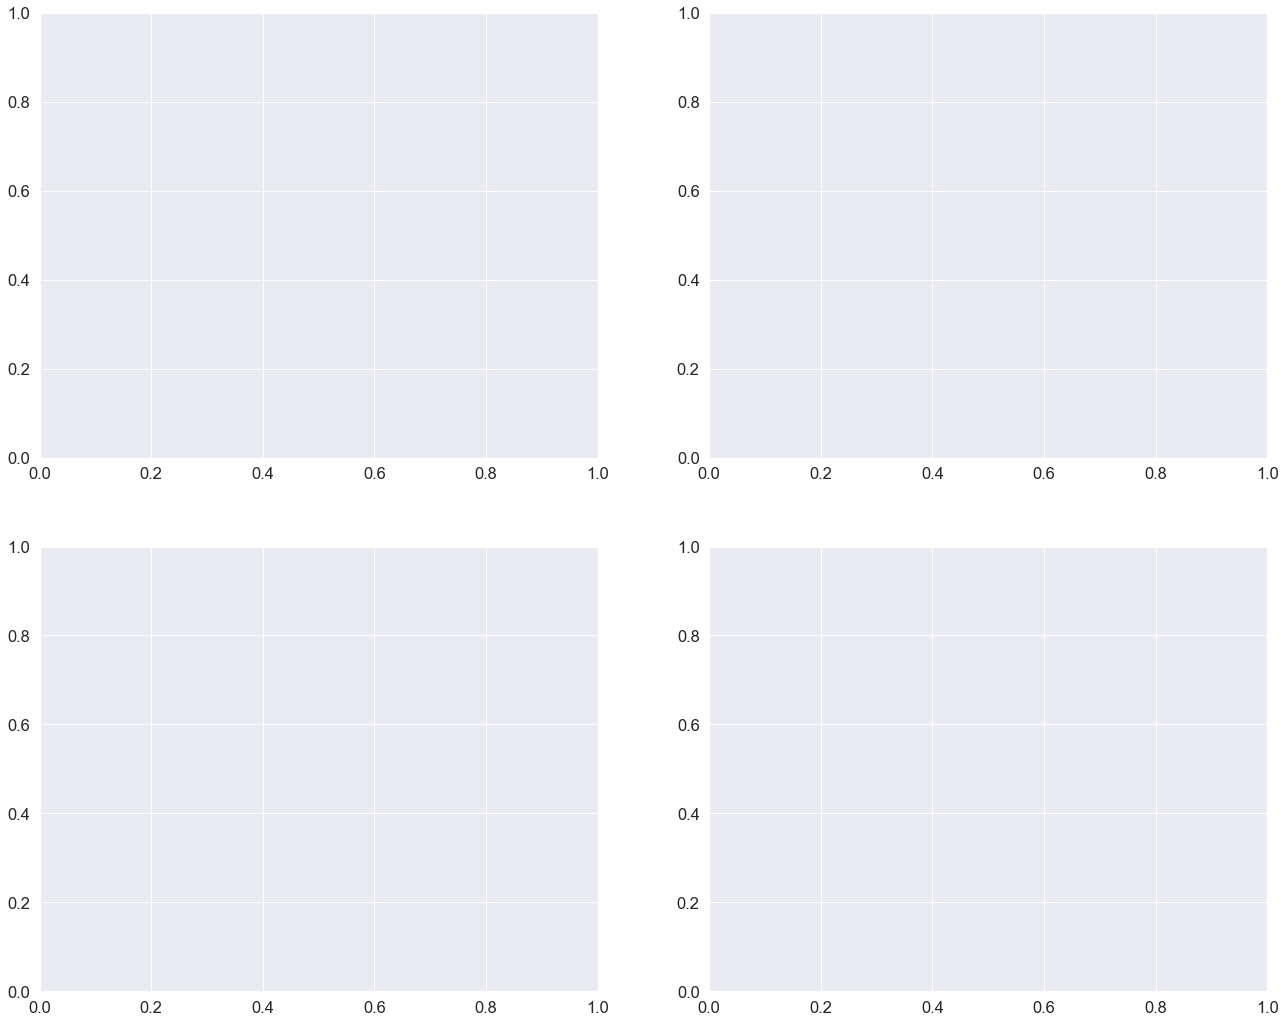

In [14]:
variables = ['T', 'dG']
labels = ['Standardized Mean Body Temperature', 'Standardized Mean Acceleration']
condition = ['Day Cycle', 'Permanent Light']

fig, ax = plt.subplots(2, 2)

change_id = np.argwhere(start_ids == df[(df['день'] == 25) & (df['час'] == 10) & (df['минуты'] == min_sep)].index[0])[0][0]

for i, condition_ids in enumerate([start_ids[:change_id], start_ids[change_id:]]):
    
    values = {}
    values['Time (hours)'] = np.concatenate([np.linspace(10, 24, epoch_length/2, endpoint=False), np.linspace(0, 10, epoch_length/2, endpoint=False)])
    values['Light'] = ["On"] * int(epoch_length/2) + ["Off"] * int(epoch_length/2)
    
    for j, variable in enumerate(variables):
        
        stack = smoothing(
                df.iloc[condition_ids[0]:(len(condition_ids)*epoch_length)+condition_ids[0], :][variable].fillna(np.nan).interpolate('spline', order=3).values
        ).reshape(len(condition_ids), epoch_length)
        
        values[labels[j]] = standardize(stack.mean(axis=0).astype(float))
        
        stacks.append(stack)
                       
    values = pd.DataFrame(values)
    
    sns.lineplot(x="Time (hours)", y=labels[0], data = values, ax=ax[i, 0], label=labels[0])
    sns.lineplot(x="Time (hours)", y=labels[1], data = values, ax=ax[i, 0], label=labels[1])
    if i == 0:
        ax[i, 0].axvline(x=10, color="c", linestyle="--", label="Lights On")
        ax[i, 0].axvline(x=22, color="r", linestyle="--",label="Light Off")
#     ax[i, 0].set_title(f"Time Series In {condition[i]} Condition") # for VM
#     ax[i, 0].set_ylabel("Standardized Amplitude") # for VM
#     ax[i, 0].legend(prop={'size': 15}) # for VM
    ax[i, 0].set_ylabel('') # for VM
    ax[i, 0].set_xlabel('') # for VM
    
    sns.regplot(x=labels[0], y=labels[1], data = values, ax=ax[i, 1])
    corr = pearsonr(values[labels[0]], values[labels[1]])
#     ax[i, 1].set_title(f"Correlation In {condition[i]} Condition (P = {round(corr[0], 2)})") for VM
#     sns.scatterplot(x=labels[0], y=labels[1], data = values, ax=ax[i, 1], hue = 'Light')
    ax[i, 1].set_ylabel('') # for VM
    ax[i, 1].set_xlabel('') # for VM

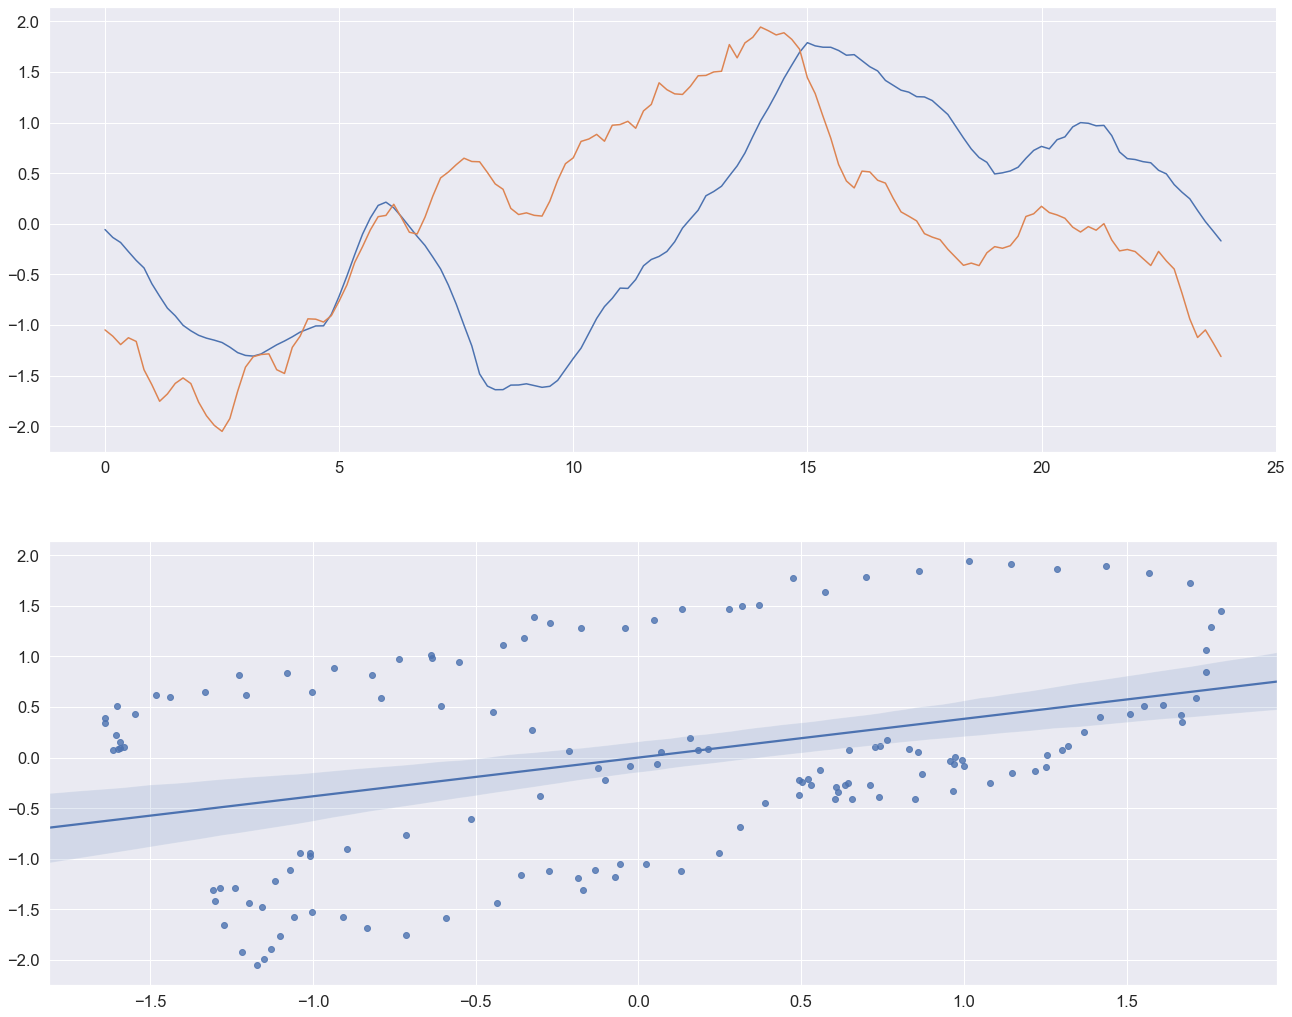

In [31]:
subject = "Cat"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/Кошка.xls", sheet_name=0).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[6:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

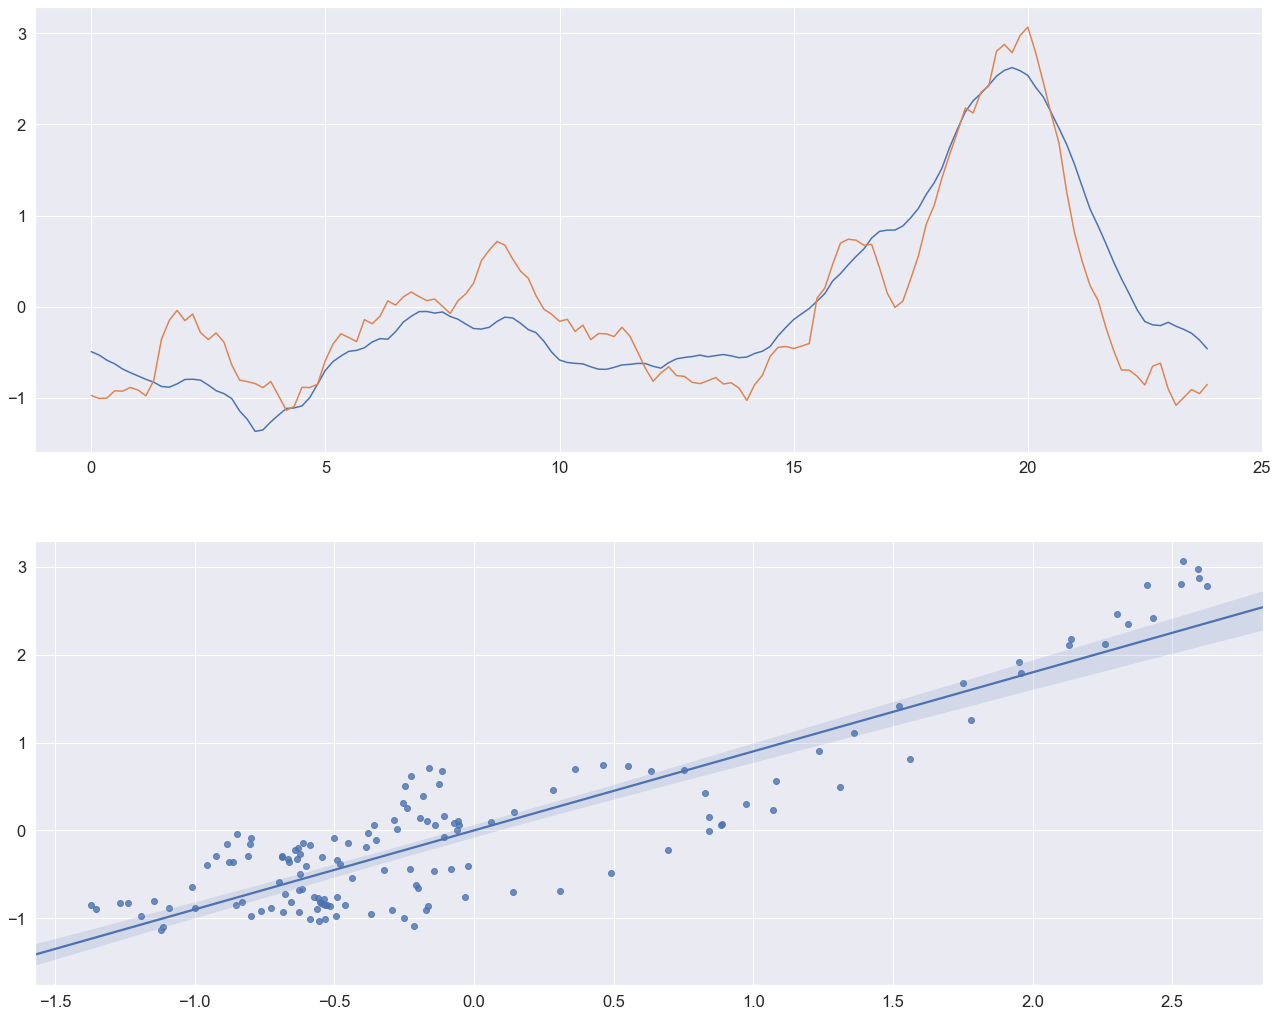

In [45]:
subject = "Weasel 1"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/хорьки.xls", sheet_name=0).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-3].dropna(how="all", axis=0)
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

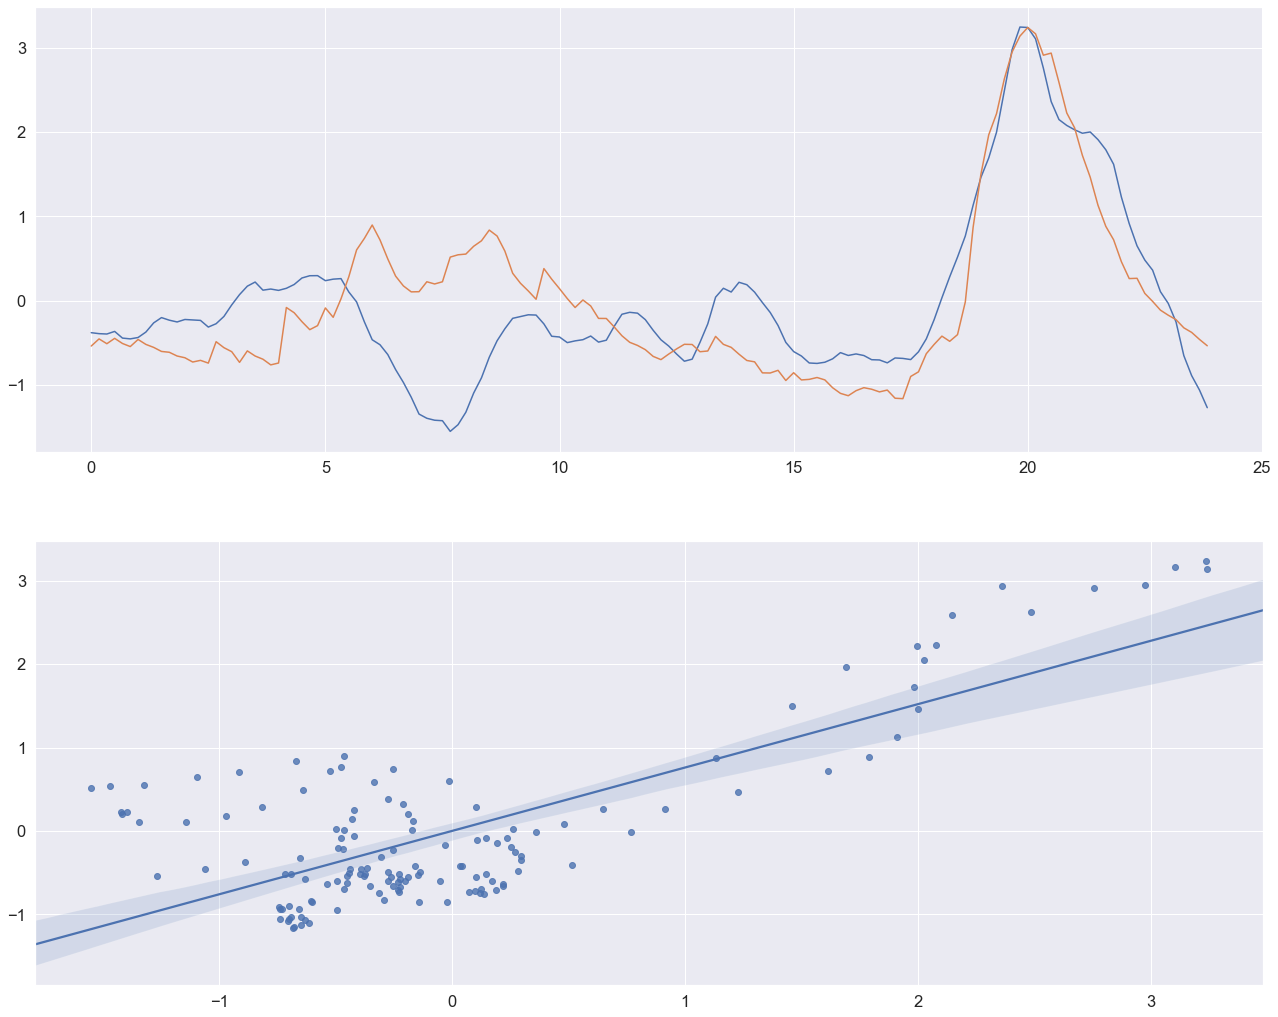

In [44]:
subject = "Weasel 2"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/хорьки.xls", sheet_name=1).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-3].dropna(how="all", axis=0)
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

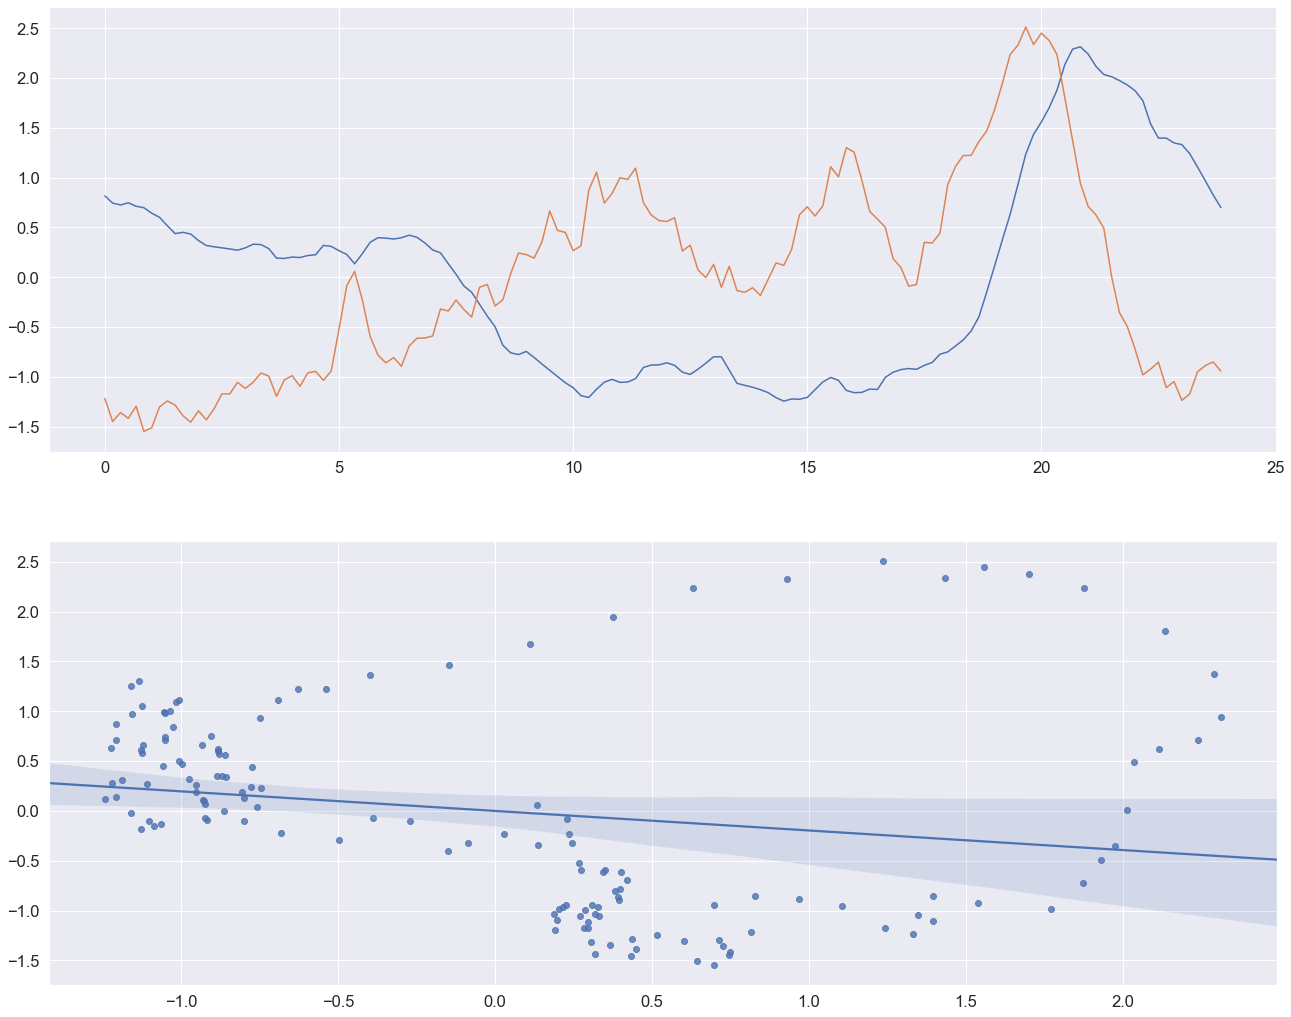

In [28]:
subject = "Weasel 3"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/хорьки.xls", sheet_name=2).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[6:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

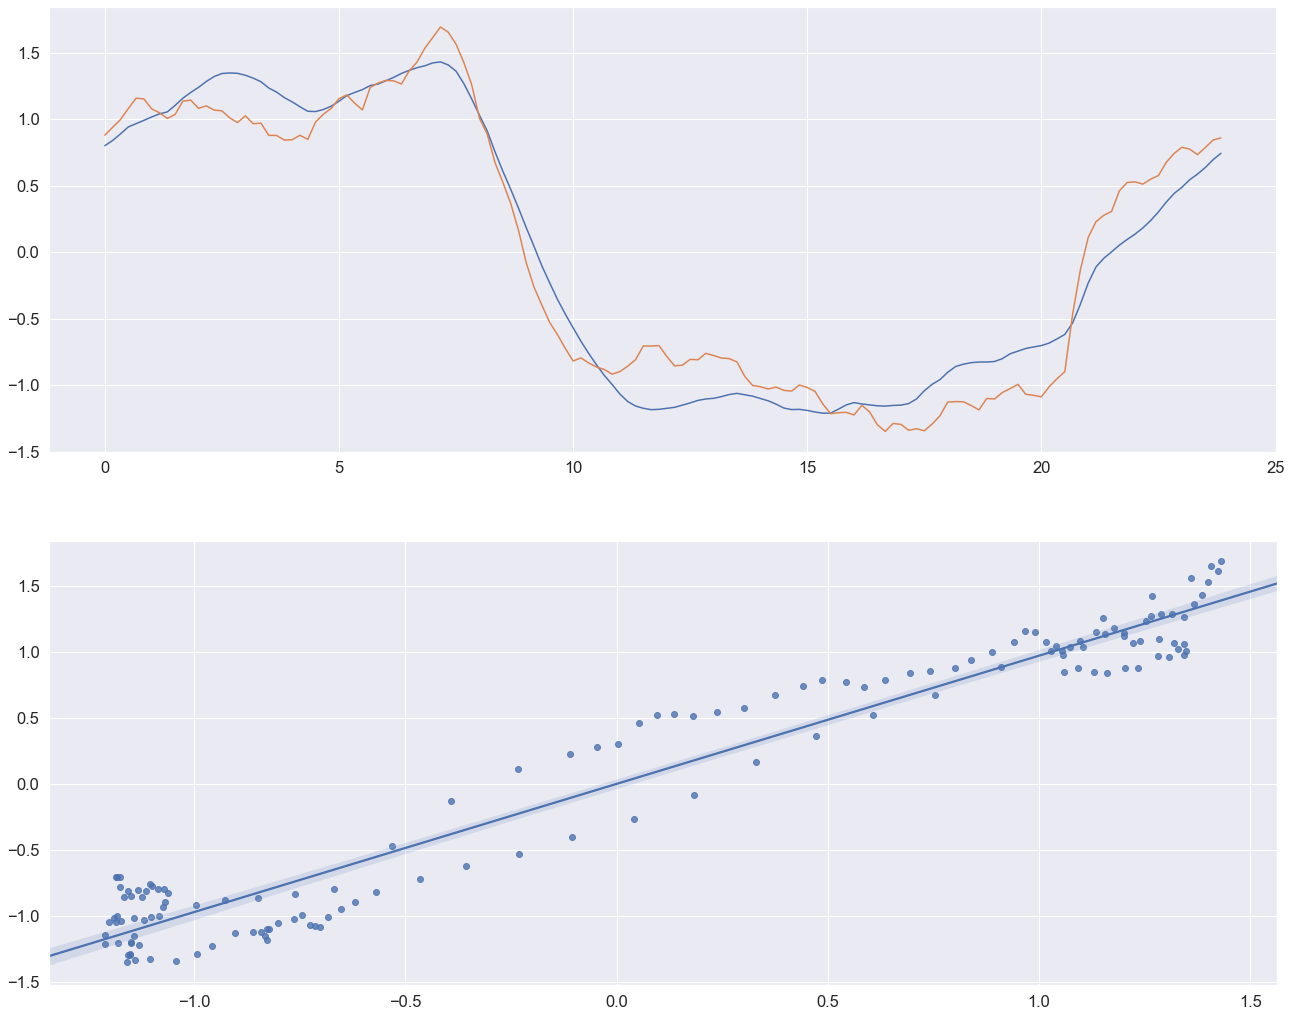

In [27]:
subject = "Rat"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/крыса.xls", sheet_name=0).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[6:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

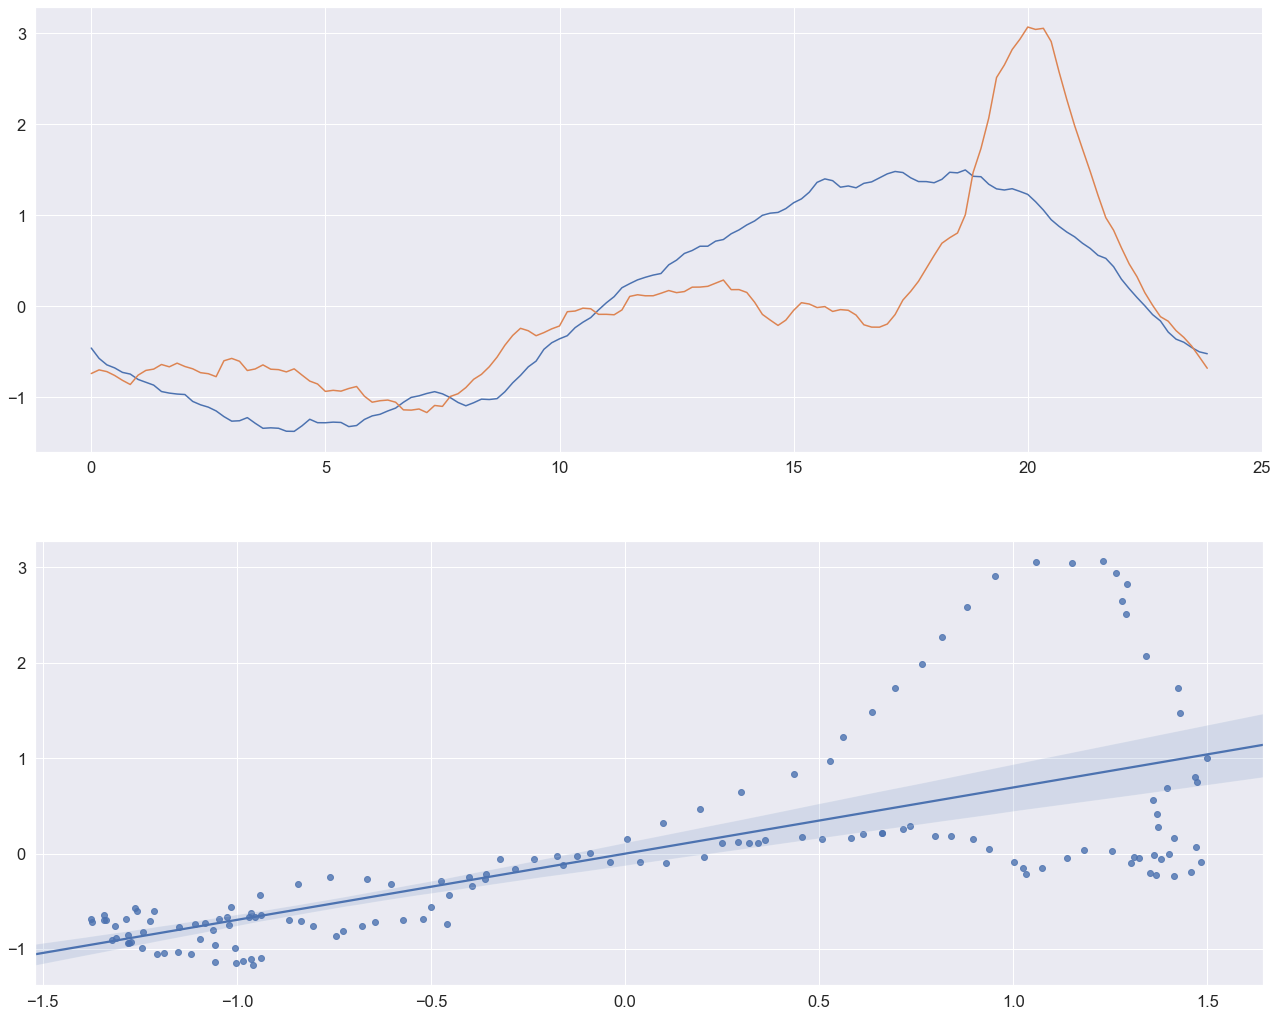

In [26]:
subject = "Sable 1"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/соболя.xls", sheet_name=0).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

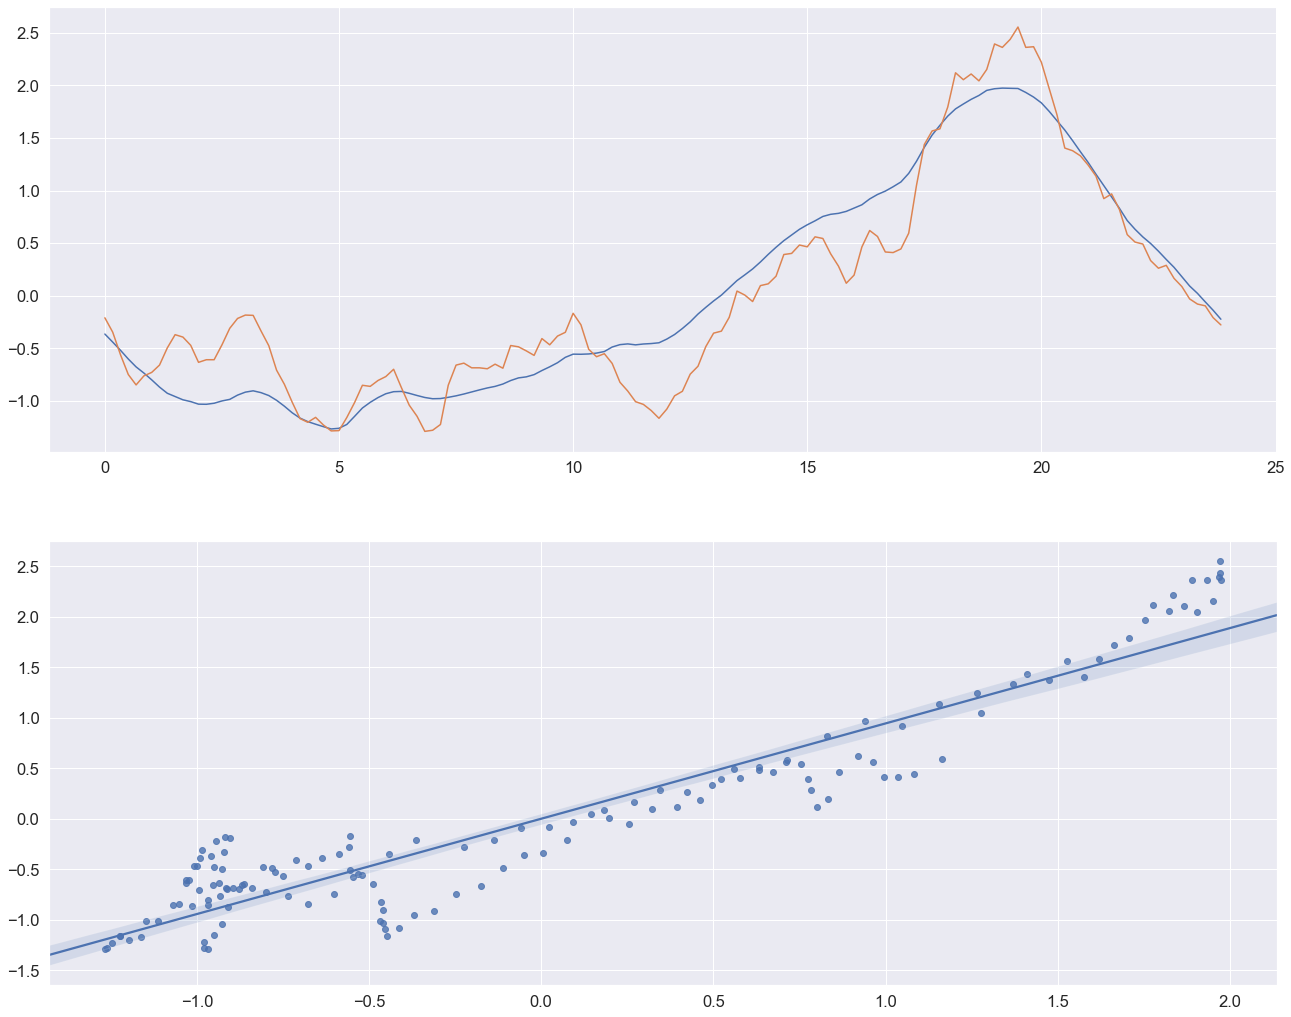

In [25]:
subject = "Sable 2"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/соболя.xls", sheet_name=1).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

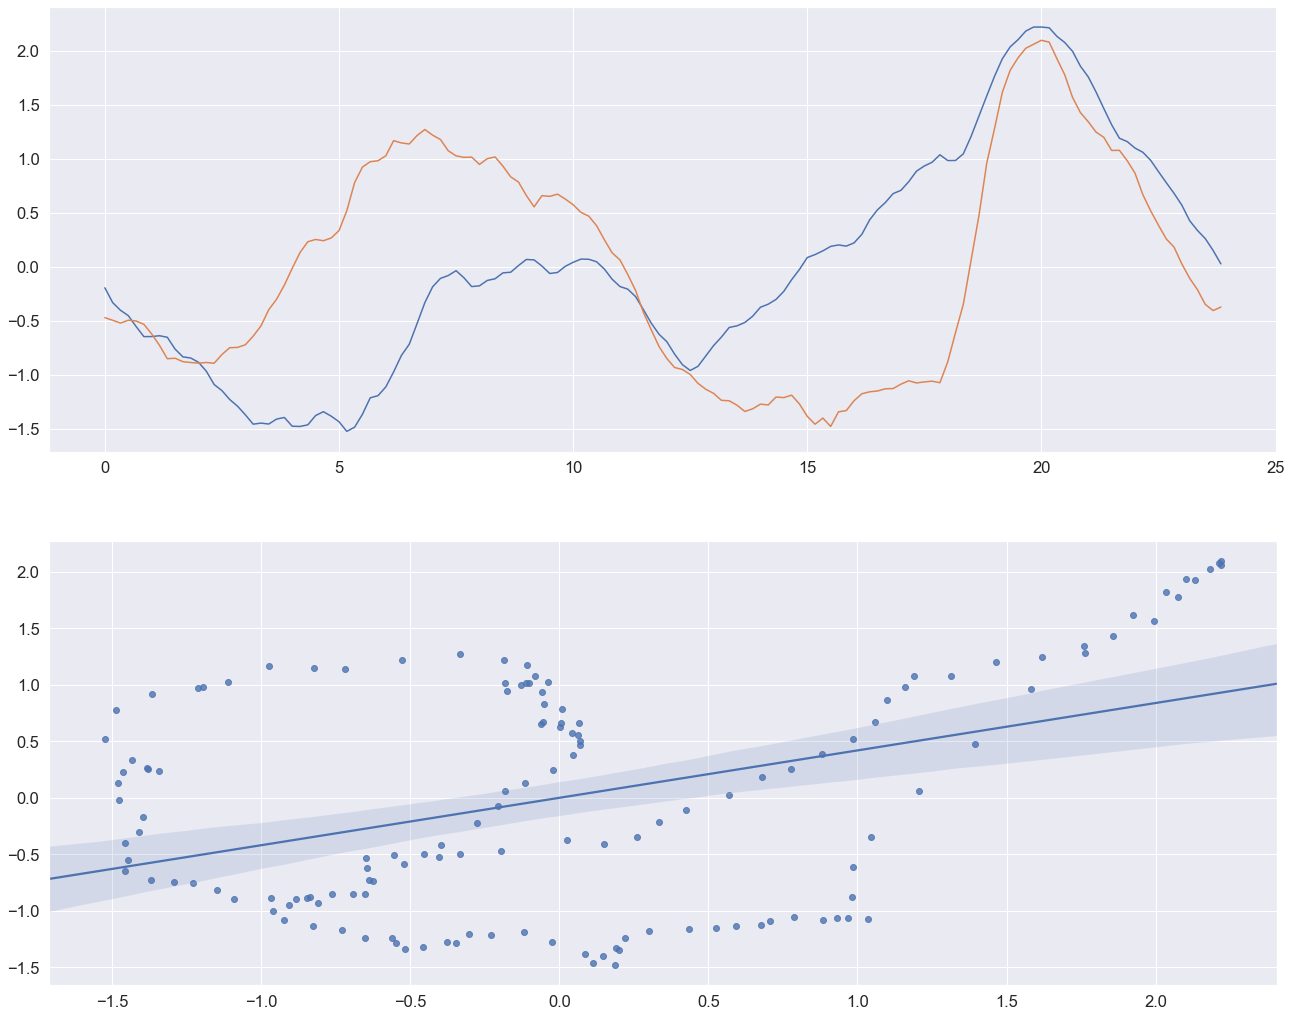

In [24]:
subject = "Sable 3"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/соболя.xls", sheet_name=2).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

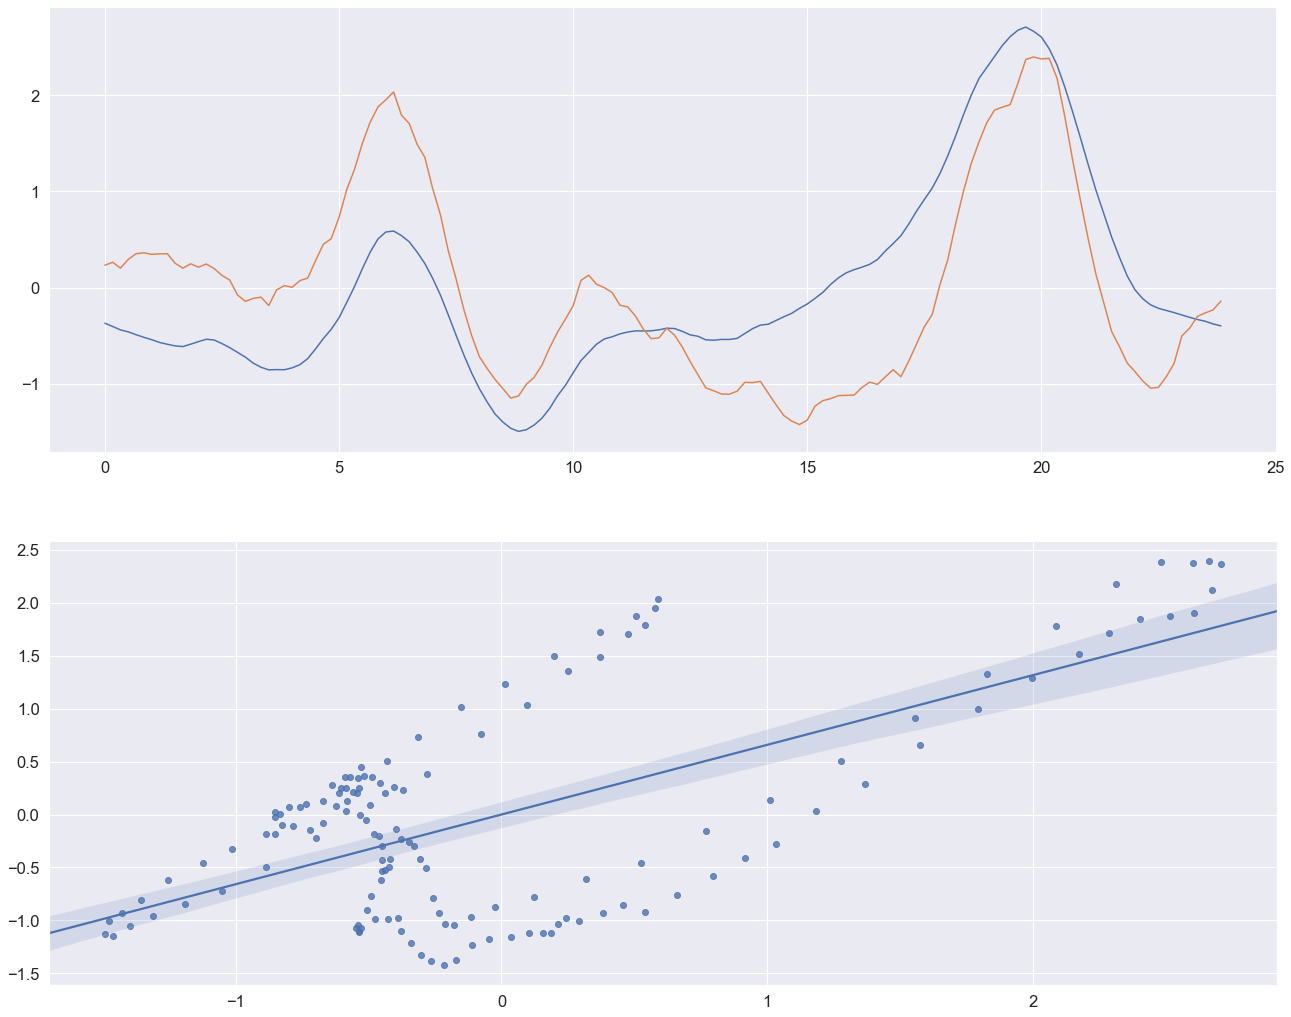

In [23]:
subject = "Sable 4"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/соболя.xls", sheet_name=3).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

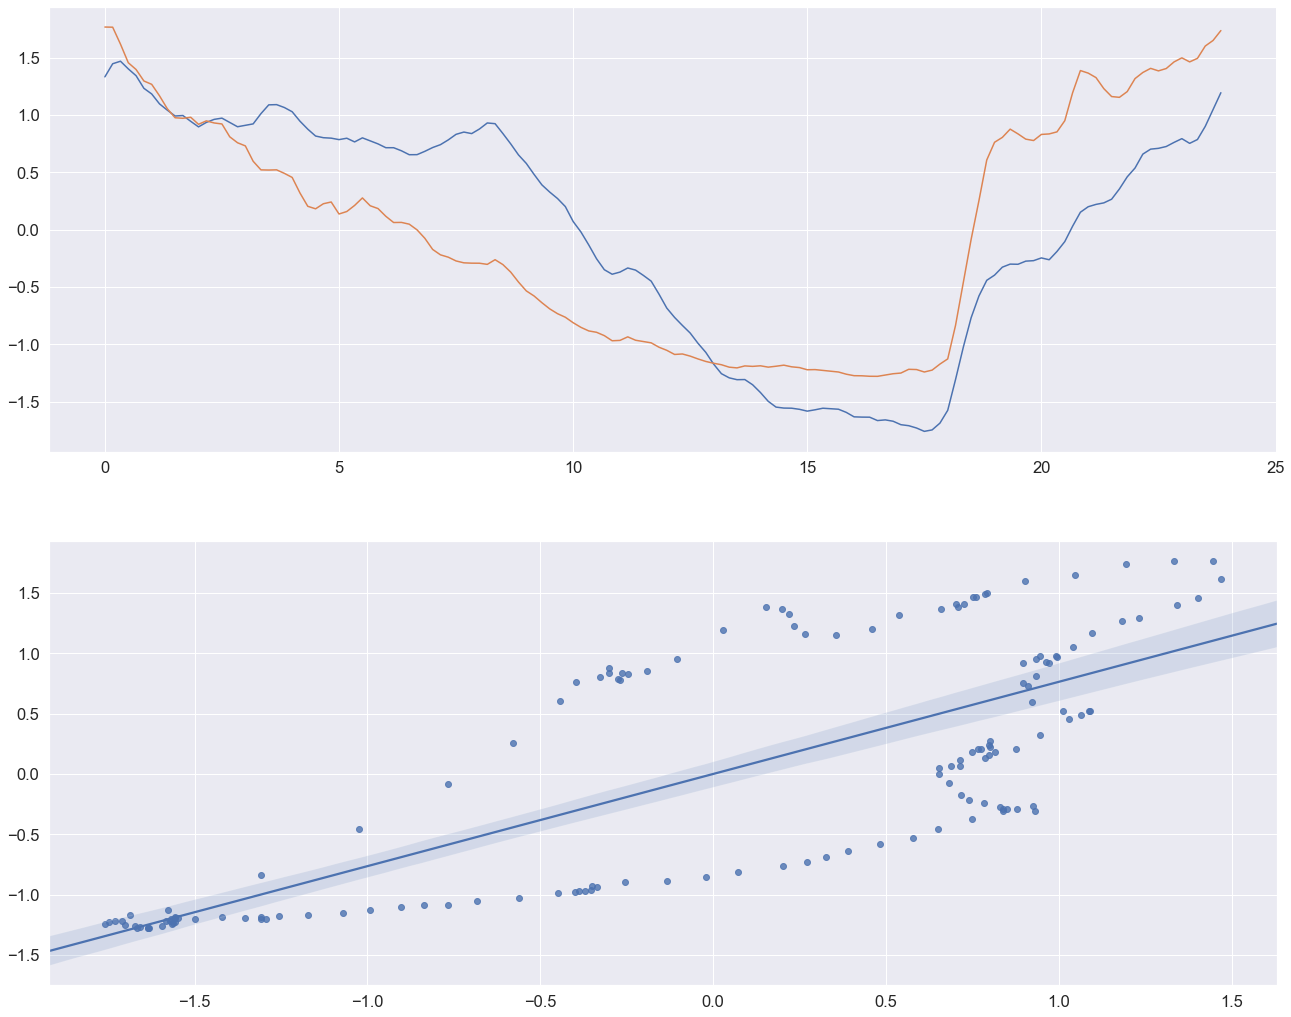

In [22]:
subject = "Hamster"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/хомяк_2019.xls", sheet_name=0).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[6:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

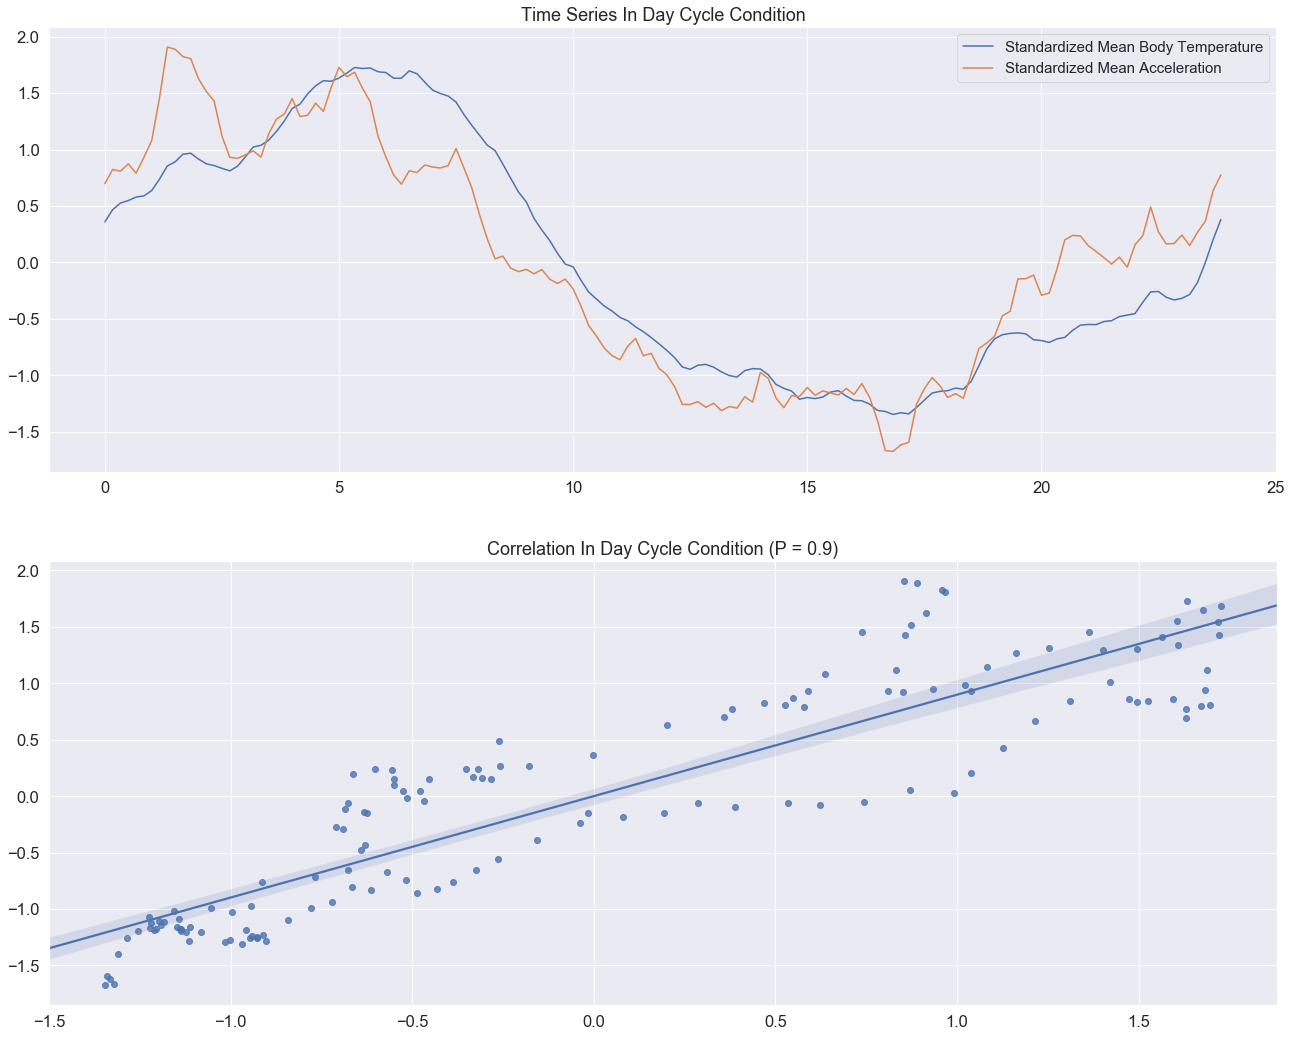

In [30]:
subject = "Hamster Hybrid 1"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/хомячок гибрид.xls", sheet_name=0).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-3]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

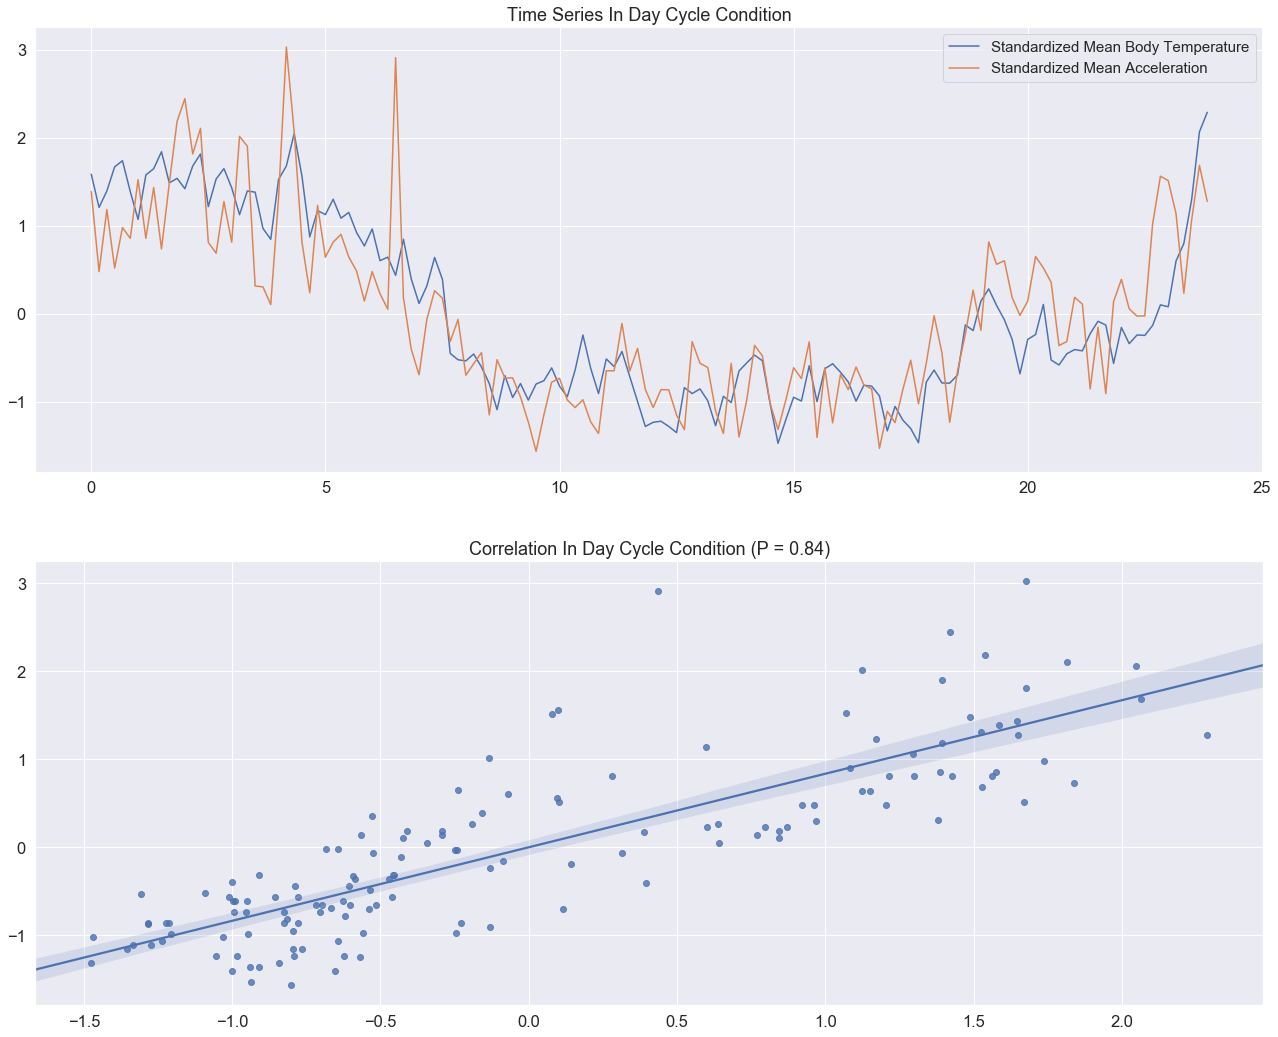

In [27]:
subject = "Hamster Hybrid 2"
a = pd.read_excel("/Users/wassilyminkow/Downloads/Минков/хомячок гибрид.xls", sheet_name=1).dropna(how="all", axis=0).dropna(how="all", axis=1).iloc[3:-4,:-6]
a.columns = a.iloc[0, :]
a = a.iloc[1:, :]
a = a.reset_index(drop=True)
df = a.iloc[:,1:]
calculate_average_time_serie(df)

In [178]:
df

8    №записи период   год месяц день час минуты секунды Ubat       T     dG  \
0          5     10  2019     1   19   3     48       0  3.3  36.022  0.031   
1          6     10  2019     1   19   3     58       0  3.3  36.463  0.109   
2          7     10  2019     1   19   4      8       0  3.3  36.558      0   
3          8     10  2019     1   19   4     18       0  3.3  36.431      0   
4          9     10  2019     1   19   4     28       0  3.3  36.367      0   
...      ...    ...   ...   ...  ...  ..    ...     ...  ...     ...    ...   
4386       9     10  2019     2   18  14     48       0  2.7  37.087  0.016   
4387      10     10  2019     2   18  14     58       0  2.7  37.285  0.016   
4388      11     10  2019     2   18  15      8       0  2.7  37.974  0.156   
4389      12     10  2019     2   18  15     18       0  2.7  37.591  0.031   
4390      13     10  2019     2   18  15     28       0  2.7  36.736  0.016   

8    dF1 dF2  
0     15   3  
1     18   5  
2      2   0  
3      3   1  
4      1   0  
...   ..  ..  
4386  13   1  
4387  10   1  
4388  18   5  
4389  14   3  
4390   8   2  

[4391 rows x 13 columns]

In [179]:
smoothing = lambda x: SimpleExpSmoothing(x).fit(smoothing_level=0.1, optimized=False).fittedvalues
hour = 0

In [180]:
min_sep = df['минуты'].min()
start_ids = df[(df['час'] == hour) &
           (df['минуты'] == min_sep)
          ].index[:-1]
epoch_length = start_ids[2] - start_ids[1]

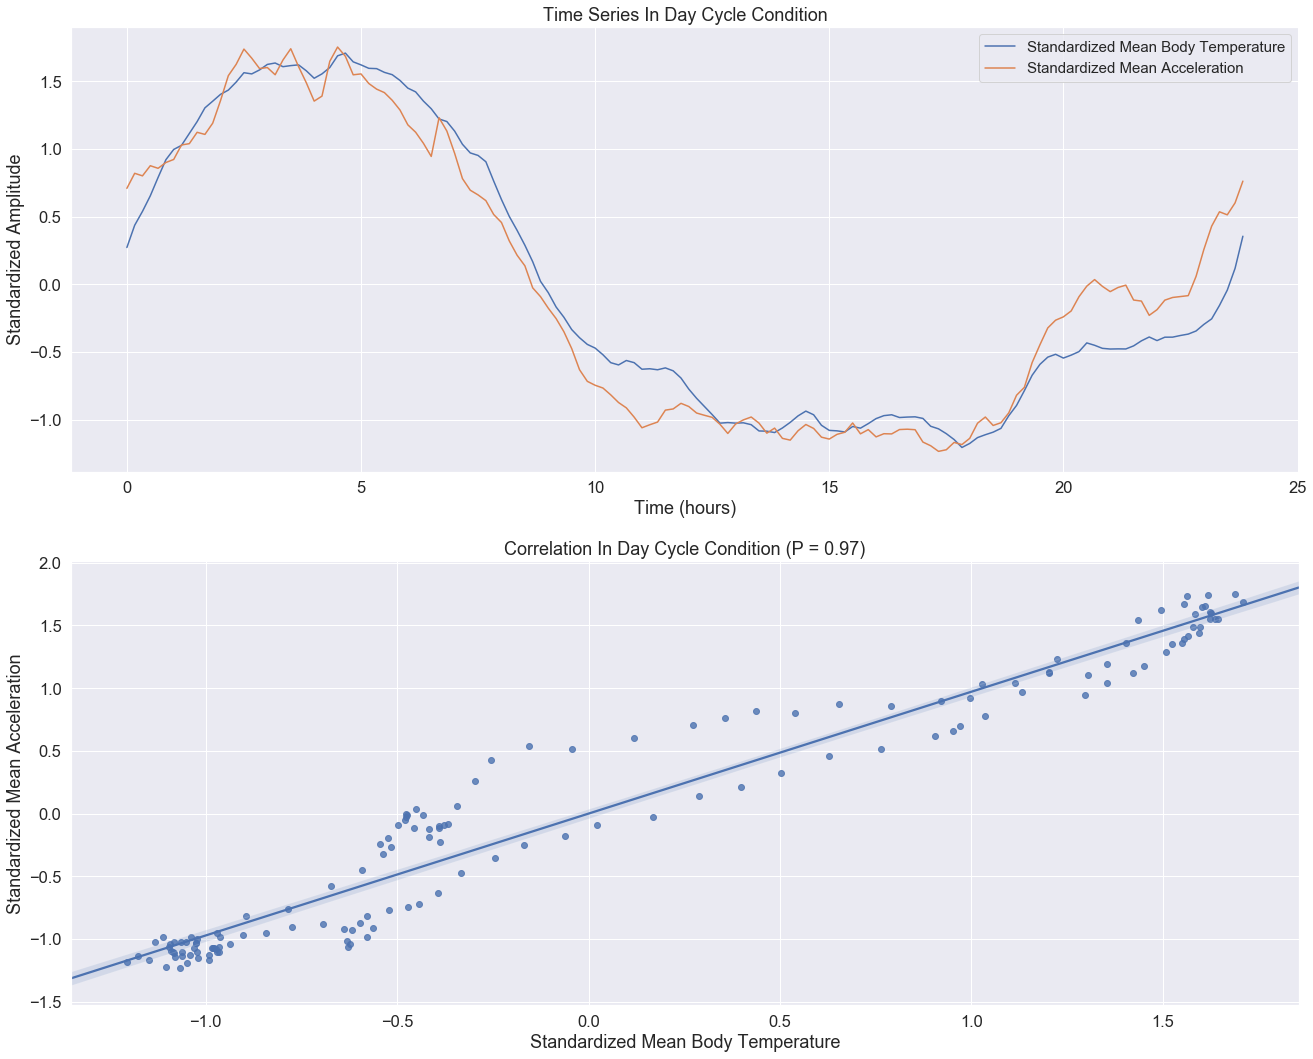

In [181]:
variables = ['T', 'dG']
labels = ['Standardized Mean Body Temperature', 'Standardized Mean Acceleration']
condition = ['Day Cycle']

fig, ax = plt.subplots(2, 1)

for i, condition_ids in enumerate([start_ids]):
    
    values = {}
    values['Time (hours)'] = np.linspace(0, 24, epoch_length, endpoint=False)
    values['Light'] = ["On"] * int(epoch_length/2) + ["Off"] * int(epoch_length/2)
    
    for j, variable in enumerate(variables):
        
        stack = smoothing(
                df.iloc[condition_ids[0]:(len(condition_ids)*epoch_length)+condition_ids[0], :][variable].fillna(np.nan).interpolate('spline', order=3).values
        ).reshape(len(condition_ids), epoch_length)
        
        values[labels[j]] = standardize(stack.mean(axis=0).astype(float))
                               
    values = pd.DataFrame(values)
    
    sns.lineplot(x="Time (hours)", y=labels[0], data = values, ax=ax[0], label=labels[0])
    sns.lineplot(x="Time (hours)", y=labels[1], data = values, ax=ax[0], label=labels[1])
    ax[0].set_title(f"Time Series In {condition[i]} Condition")
    ax[0].set_ylabel("Standardized Amplitude")
    ax[0].legend(prop={'size': 15})
    
    sns.regplot(x=labels[0], y=labels[1], data = values, ax=ax[1])
    corr = pearsonr(values[labels[0]], values[labels[1]])
    ax[1].set_title(f"Correlation In {condition[i]} Condition (P = {round(corr[0], 2)})")
    
    plt.savefig(f"{subject}.png")

In [29]:
def calculate_average_time_serie(df):
    
    smoothing = lambda x: SimpleExpSmoothing(x).fit(smoothing_level=0.1, optimized=False).fittedvalues
    hour = 0
    
    min_sep = df['минуты'].min()
    start_ids = df[(df['час'] == hour) &
               (df['минуты'] == min_sep)
              ].index[:-1]
    epoch_length = start_ids[2] - start_ids[1]
    
    variables = ['T', 'dG']
    labels = ['Standardized Mean Body Temperature', 'Standardized Mean Acceleration']
    condition = ['Day Cycle']

    fig, ax = plt.subplots(2, 1)

    for i, condition_ids in enumerate([start_ids]):

        values = {}
        values['Time (hours)'] = np.linspace(0, 24, epoch_length, endpoint=False)
        values['Light'] = ["On"] * int(epoch_length/2) + ["Off"] * int(epoch_length/2)

        for j, variable in enumerate(variables):

            stack = smoothing(
                    df.iloc[condition_ids[0]:(len(condition_ids)*epoch_length)+condition_ids[0], :][variable].fillna(np.nan).interpolate('spline', order=3).values
            ).reshape(len(condition_ids), epoch_length)

            values[labels[j]] = standardize(stack.mean(axis=0).astype(float))

        values = pd.DataFrame(values)
        
        a = sns.lineplot(x="Time (hours)", y=labels[0], data = values, ax=ax[0], label=labels[0])
        b = sns.lineplot(x="Time (hours)", y=labels[1], data = values, ax=ax[0], label=labels[1])
#         a.legend_.remove() # for VM
        ax[0].set_title(f"Time Series In {condition[i]} Condition")  # for VM
        ax[0].set_ylabel("Standardized Amplitude")  # for VM
        ax[0].legend(prop={'size': 15})  # for VM
        ax[0].set_ylabel('') # for VM
        ax[0].set_xlabel('') # for VM

        sns.regplot(x=labels[0], y=labels[1], data = values, ax=ax[1])
        corr = pearsonr(values[labels[0]], values[labels[1]])
        ax[1].set_title(f"Correlation In {condition[i]} Condition (P = {round(corr[0], 2)})")  # for VM
        ax[1].set_ylabel('') # for VM
        ax[1].set_xlabel('') # for VM
        plt.savefig(f"{subject}.png")